# Análise exploratória de dados da NBA no período (2012-2024)

## Descrição:

A NBA (National Basketball Association) é a principal liga de basquetebol profissional da América do Norte. Com 30 franquias (29 nos Estados Unidos e 1 no Canadá), a NBA também é considerada a principal liga de basquete do mundo. É também um membro ativo da USA Basketball (USAB), que é reconhecida pela FIBA (a Federação Internacional de Basquetebol) como a entidade máxima e organizadora do basquetebol nos Estados Unidos. A NBA é uma das 4 'major leagues' de esporte profissional na América do Norte.

## Objetivo:
 O objetivo desta análise exploratória de dados é realizar um estudo das fases de temporada regular e playoffs, analisando o desempenho dos jogadores no período de 2012 até 2024. Assim, iremos ver os jogadores destaques nas duas fases do torneio e quais deles aumentam ou diminuem de desempenho na fase decisiva da competição. Por fim, iremos selecionar dois dos maiores jogadores desta geração LeBron James e Stephen Curry e realizar uma análise mais cuidadosa do seu desempenho neste período.
  
 
 
Fonte dos dados: https://www.kaggle.com/datasets/shivamkumar121215/nba-stats-dataset-for-last-10-years

## Colunas e abreviações:

1) Abreviações das colunas
- "GP" = "Games Played"
- "MIN" = "Minutes Played"
- "PTS" = "Points"
- "FGM" = "Field Goals Made"
- "FGA" = "Field Goals Attempted"
- "FG_PCT" = "Field Goal Percentage"
- "FG3M" = "3 Point Field Goals Made"
- "FG3A" = "3 Point Field Goals Attempted"
- "FG3_PCT" = "3 Point Field Goal Percentage"
- "FTM" = "Free Throws Made"
- "FTA" = "Free Throws Attempted"
- "FT_PCT" = "Free Throw Percentage"
- "OREB" = "Offensive Rebounds"
- "DREB" = "Defensive Rebounds"
- "REB" = "Rebounds"
- "AST" = "Assists"
- "STL" = "Steals"
- "BLK" = "Blocks"
- "TOV" = "Turnovers"
- "PF" = "Personal Fouls"


2) Nomes dos times e abreviações

- BKN = Brooklyn Nets
- BOS = Boston Celtics
- NYK = New York Knicks
- PHI = Philadelphia 76ers
- TOR = Toronto Raptors
- CHI = Chicago Bulls
- CLE = Cleveland Cavaliers
- DET = Detroit Pistons"
- IND = Indiana Pacers
- MIL = Milwaukee Bucks
- ATL = Atlanta Hawks
- CHA = Charlotte Hornets
- MIA = Miami Heat
- ORL = Orlando Magic
- WAS = Washington Wizards
- DEN = Denver Nuggets
- MIN = Minnesota Timberwolves 
- OKC = Oklahoma City Thunder
- POR = Portland Trail Blazers
- UTA = Utah Jazz
- GSW = Golden State Warriors
- LAC = LA Clippers
- LAL = Los Angeles Lakers
- PHX = Phoenix Suns
- SAC = Sacramento Kings
- DAL = Dallas Mavericks
- HOU = Houston Rockets
- MEM = Memphis Grizzlies
- NOP = New Orleans Pelicans
- SAS = San Antonio Spurs
- NOH = New Orleans Hornets



## Conhecendo o dataset 

In [1]:
## Importando as bibliotecas 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
## lendo o arquivo
df = pd.read_csv('nba.csv')

In [3]:
## mostrando os 5 primeiros registros na tela
df.head(5)

,year,Season_type,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,...,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
0,2012-13,Regular%20Season,201142,1,Kevin Durant,1610612760,OKC,81,3119,731,...,640,374,116,105,280,143,2280,2462,1.34,0.41
1,2012-13,Regular%20Season,977,2,Kobe Bryant,1610612747,LAL,78,3013,738,...,433,469,106,25,287,173,2133,1921,1.63,0.37
2,2012-13,Regular%20Season,2544,3,LeBron James,1610612748,MIA,76,2877,765,...,610,551,129,67,226,110,2036,2446,2.44,0.57
3,2012-13,Regular%20Season,201935,4,James Harden,1610612745,HOU,78,2985,585,...,379,455,142,38,295,178,2023,1872,1.54,0.48
4,2012-13,Regular%20Season,2546,5,Carmelo Anthony,1610612752,NYK,67,2482,669,...,460,171,52,32,175,205,1920,1553,0.98,0.30


In [4]:
## Verificando o tamanho da tabela
df.shape

(8835, 30)

In [5]:
## Informações sobre o dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8835 entries, 0 to 8834
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         8835 non-null   object 
 1   Season_type  8835 non-null   object 
 2   PLAYER_ID    8835 non-null   int64  
 3   RANK         8835 non-null   int64  
 4   PLAYER       8835 non-null   object 
 5   TEAM_ID      8835 non-null   int64  
 6   TEAM         8835 non-null   object 
 7   GP           8835 non-null   int64  
 8   MIN          8835 non-null   int64  
 9   FGM          8835 non-null   int64  
 10  FGA          8835 non-null   int64  
 11  FG_PCT       8835 non-null   float64
 12  FG3M         8835 non-null   int64  
 13  FG3A         8835 non-null   int64  
 14  FG3_PCT      8835 non-null   float64
 15  FTM          8835 non-null   int64  
 16  FTA          8835 non-null   int64  
 17  FT_PCT       8835 non-null   float64
 18  OREB         8835 non-null   int64  
 19  DREB  

## Preparação da base de dados

 Vamos inicialmente dividir o dataframe em dois. Um contendo as estatísticas de regular season e outra contendo a informação dos playoffs.


In [6]:
## criação das base de dados
df_regular = df.copy()
df_playoffs = df.copy()

df_regular = df.query('Season_type == "Regular%20Season" ')

df_playoffs = df.query('Season_type == "Playoffs" ')

Com os dataframes separados podemos nos livrar das colunas desnecessárias em cada um deles: __Season_type, Player_ID, Rank, Team_ID__


In [7]:
## Excluindo as colunas desnecessárias

df_regular.drop(['Season_type','RANK' ,'PLAYER_ID', 'TEAM_ID' ], axis = 1, inplace= True)

df_playoffs.drop(['Season_type','RANK' ,'PLAYER_ID', 'TEAM_ID' ], axis = 1, inplace= True)

## Resetando os indices de ambos

df_regular.reset_index(drop = True, inplace = True)

df_playoffs.reset_index(drop = True, inplace = True)

In [8]:
## Assim ficamos com o df da temporada regular 

df_regular.head()

,year,PLAYER,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,...,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
0,2012-13,Kevin Durant,OKC,81,3119,731,1433,0.510,139,334,...,640,374,116,105,280,143,2280,2462,1.34,0.41
1,2012-13,Kobe Bryant,LAL,78,3013,738,1595,0.463,132,407,...,433,469,106,25,287,173,2133,1921,1.63,0.37
2,2012-13,LeBron James,MIA,76,2877,765,1354,0.565,103,254,...,610,551,129,67,226,110,2036,2446,2.44,0.57
3,2012-13,James Harden,HOU,78,2985,585,1337,0.438,179,486,...,379,455,142,38,295,178,2023,1872,1.54,0.48
4,2012-13,Carmelo Anthony,NYK,67,2482,669,1489,0.449,157,414,...,460,171,52,32,175,205,1920,1553,0.98,0.30


In [9]:
## Assim ficamos com o df dos playoffs 
df_playoffs.head()

,year,PLAYER,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,...,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
0,2012-13,LeBron James,MIA,23,960,212,432,0.491,36,96,...,193,152,41,18,70,43,596,671,2.17,0.59
1,2012-13,Tony Parker,SAS,21,765,167,365,0.458,11,31,...,68,146,24,3,53,26,432,397,2.75,0.45
2,2012-13,Tim Duncan,SAS,21,735,151,321,0.470,0,1,...,214,40,18,34,42,53,381,456,0.95,0.43
3,2012-13,Paul George,IND,19,780,119,277,0.430,34,104,...,141,96,25,9,75,72,365,368,1.28,0.33
4,2012-13,Dwyane Wade,MIA,22,782,144,315,0.457,1,4,...,102,105,38,23,58,45,349,368,1.81,0.66


## Analisando a temporada Regular

Nessa seção vamos analisar apenas a temporada regular. Aqui a intenção é verificar o impacto dos jogadores nesta fase e posteriormente analisar quais deles mantém, aumentam ou diminuem seu impacto na fase decisiva da competição. Aqui vamos olhar principalmente para a quantidade de jogos, pontos, rebotes, assistências, roubos de bola e tocos.

#### Estatísticas descritiva da base de dados
Como primeiro passo vamos olhar as estatística da base de dados da temporada regular.

In [10]:
df_regular.describe()

,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,...,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
count,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,...,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000
mean,48.819460,1114.947915,183.331203,398.213932,0.441856,47.970123,133.735421,0.280993,80.226873,104.543378,...,201.636843,109.384247,35.271928,22.447356,62.514619,92.298131,494.859402,561.885924,1.631938,0.646006
std,25.140703,831.104103,168.996330,358.340768,0.110558,56.509925,148.535353,0.155900,95.935699,119.797243,...,188.278216,126.875411,31.360962,28.512778,59.363511,66.094802,464.562413,503.875160,1.021103,0.479361
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-8.000000,0.000000,0.000000
25%,28.000000,333.000000,41.000000,94.000000,0.400000,2.000000,10.000000,0.224000,13.000000,19.000000,...,52.000000,19.500000,9.000000,4.000000,15.000000,32.000000,107.000000,130.000000,1.000000,0.380000
50%,55.000000,1037.000000,141.000000,309.000000,0.441000,26.000000,81.000000,0.331000,47.000000,64.000000,...,157.000000,67.000000,29.000000,13.000000,47.000000,90.000000,374.000000,453.000000,1.510000,0.560000
75%,70.000000,1806.500000,281.000000,613.000000,0.491000,77.000000,217.000000,0.375000,110.000000,146.000000,...,290.000000,149.000000,53.000000,30.000000,93.000000,142.000000,759.000000,867.000000,2.120000,0.810000
max,84.000000,3167.000000,857.000000,1941.000000,1.000000,402.000000,1028.000000,1.000000,754.000000,881.000000,...,1247.000000,907.000000,191.000000,269.000000,464.000000,301.000000,2818.000000,3039.000000,13.000000,7.000000


Visualizando os histogramas para cada uma das colunas de interesse:

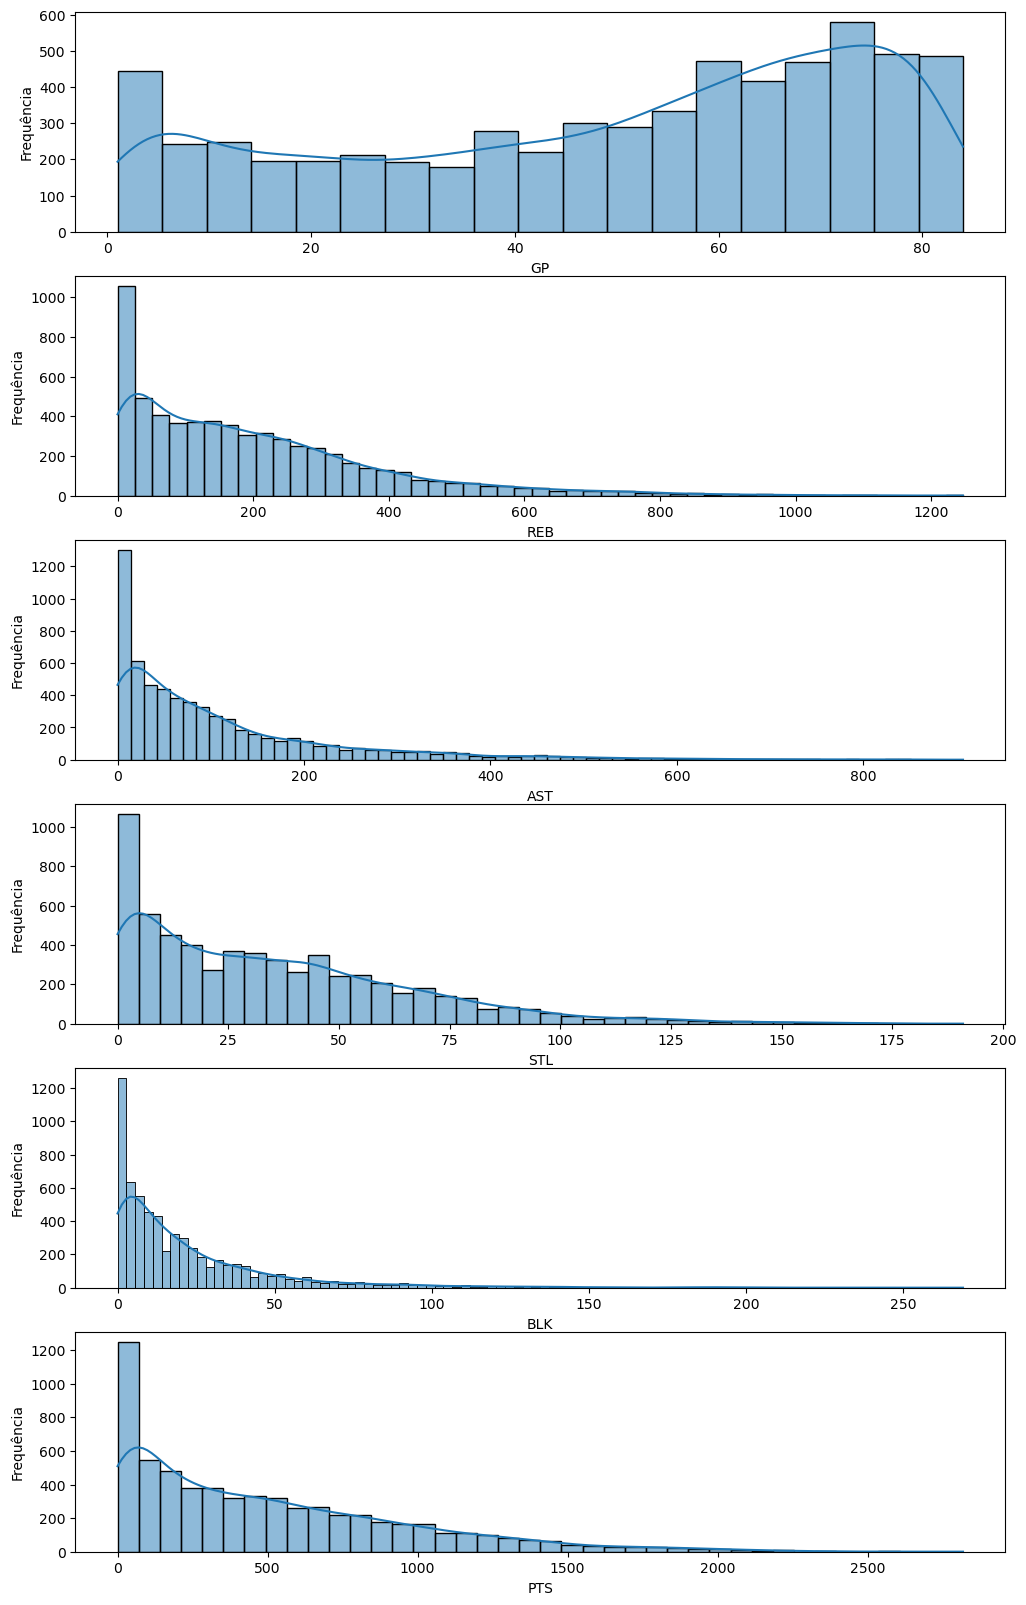

In [11]:
# Colunas de nosso interesse
cols_int = ['GP','REB', 'AST', 'STL', 'BLK', 'PTS' ]

# Configurar o tamanho da figura
plt.figure(figsize=(12, 20))

# Loop para plotar histogramas
for i, col in enumerate(cols_int):
    plt.subplot(len(cols_int), 1, i + 1)  # Cria subplots para cada histograma
    sns.histplot(df_regular[col], kde=True)  # Usando seaborn para criar histogramas com a curva KDE
    plt.xlabel(col)
    plt.ylabel('Frequência')

# Mostrar o gráfico
plt.show()


Os histogramas nos permitem concluir que nossa base de dados contém jogadores que entraram em quadra ao menos uma vez no período (2012-2024). Além disso, temos uma grande quantidade de jogadres que não contribuiram em nenhum aspecto do jogo que estamos analisando: REB, AST, PTS, STL, BLK.

Com essa rápida análise vamos prosseguir verificando quais os principais jogadores na temporada regular em cada um das estatísticas que estamos interessados.

#### Top 7 jogadores com mais partidas na temporada regular 2012-2024

In [12]:
## criação do dataset
df_jogos = df_regular.copy()

df_jogos = df_jogos.groupby('PLAYER')[['GP']].sum()

df_jogos.sort_values('GP', inplace = True, ascending = False)

df_jogos = df_jogos[0:7]

df_jogos

,GP
PLAYER,
Harrison Barnes,911
DeMar DeRozan,888
Jeff Green,870
P.J. Tucker,866
Andre Drummond,864
Jonas Valanciunas,856
Tobias Harris,855


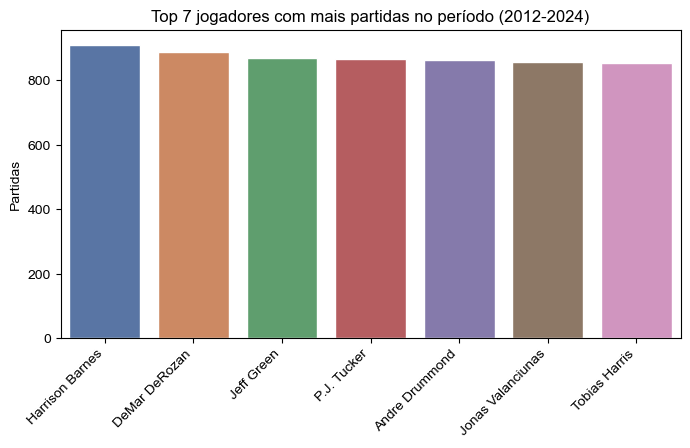

In [13]:
## visualização gráfica

fig, ax = plt.subplots(figsize = (8,4))
sns.set_theme(style = 'white')

ax = sns.barplot(data = df_jogos, x = df_jogos.index, y ='GP', palette = 'deep')
ax.set_xlabel('')
ax.set_ylabel('Partidas')
ax.set_title('Top 7 jogadores com mais partidas no período (2012-2024)')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

ax

plt.show()

#### Top 7 jogadores com mais pontos na temporada regular 2012-2024

In [14]:
## criação do dataset
df_pontos = df_regular.copy()

df_pontos = df_pontos.groupby('PLAYER')[['PTS']].sum()

df_pontos.sort_values('PTS', inplace = True, ascending = False)

df_pontos = df_pontos[0:7]

df_pontos

,PTS
PLAYER,
James Harden,23090
LeBron James,21429
Damian Lillard,21151
Stephen Curry,20513
DeMar DeRozan,20456
Russell Westbrook,19282
Kevin Durant,18946


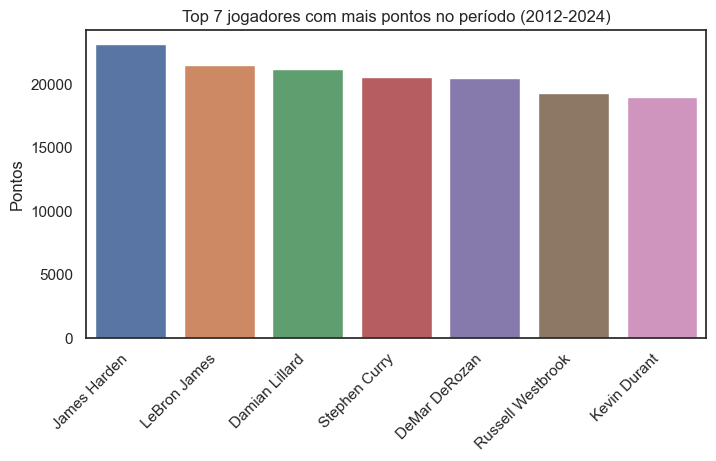

In [15]:
## visualização gráfica

fig, ax = plt.subplots(figsize = (8,4))
sns.set_theme(style = 'white')

ax = sns.barplot(data = df_pontos, x = df_pontos.index, y ='PTS', palette = 'deep')
ax.set_xlabel('')
ax.set_ylabel('Pontos')
ax.set_title('Top 7 jogadores com mais pontos no período (2012-2024)')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

ax

plt.show()


#### Top 7 jogadores com mais rebotes na temporada regular 2012-2024

In [16]:
## criação do dataset

df_reb = df_regular.copy()

df_reb = df_reb.groupby('PLAYER')[['REB']].sum()

df_reb.sort_values('REB', inplace = True, ascending = False)

df_reb = df_reb[0:7]

df_reb

,REB
PLAYER,
Andre Drummond,10671
Nikola Vucevic,9189
Rudy Gobert,8915
DeAndre Jordan,8791
Jonas Valanciunas,8096
Anthony Davis,7825
Giannis Antetokounmpo,7732


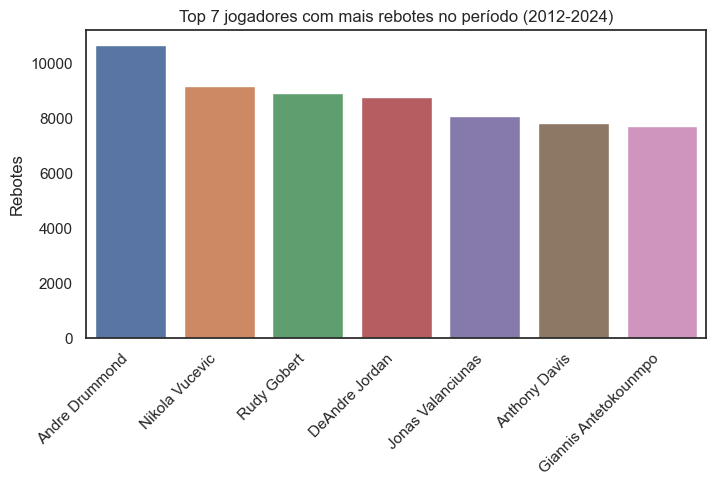

In [17]:
## visualização gráfica

fig, ax = plt.subplots(figsize = (8,4))
sns.set_theme(style = 'white')

ax = sns.barplot(data = df_reb, x = df_reb.index, y ='REB', palette = 'deep')
ax.set_xlabel('')
ax.set_ylabel('Rebotes')
ax.set_title('Top 7 jogadores com mais rebotes no período (2012-2024)')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

ax

plt.show()


#### Top 7 jogadores com mais assistências na temporada regular 2012-2024

In [18]:
## criação do dataset

df_ast = df_regular.copy()

df_ast = df_ast.groupby('PLAYER')[['AST']].sum()

df_ast.sort_values('AST', inplace = True, ascending = False)

df_ast = df_ast[0:7]

df_ast

,AST
PLAYER,
Russell Westbrook,7349
Chris Paul,7123
James Harden,7087
LeBron James,6258
Damian Lillard,5659
Kyle Lowry,5285
Jrue Holiday,5100


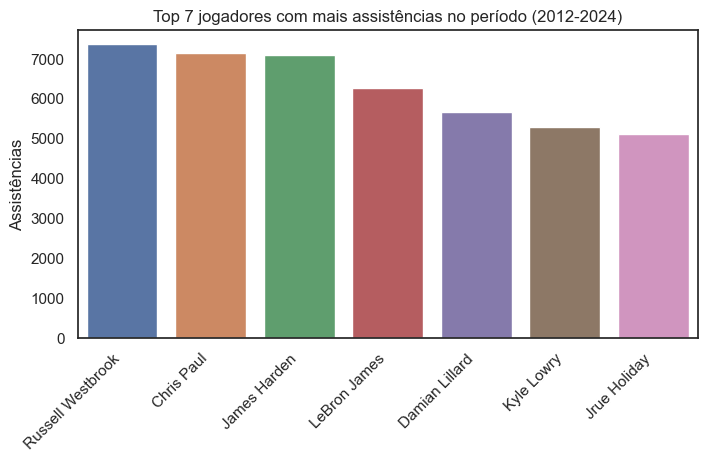

In [19]:
## visualização gráfica

fig, ax = plt.subplots(figsize = (8,4))
sns.set_theme(style = 'white')

ax = sns.barplot(data = df_ast, x = df_ast.index, y ='AST', palette = 'deep')
ax.set_xlabel('')
ax.set_ylabel('Assistências')
ax.set_title('Top 7 jogadores com mais assistências no período (2012-2024)')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

ax

plt.show()

#### Top 7 jogadores com mais tocos na temporada regular 2012-2024

In [20]:
## criação do dataset

df_tocos = df_regular.copy()

df_tocos = df_tocos.groupby('PLAYER')[['BLK']].sum()

df_tocos.sort_values('BLK', inplace = True, ascending = False)

df_tocos = df_tocos[0:7]

df_tocos

,BLK
PLAYER,
Anthony Davis,1705
Rudy Gobert,1614
Brook Lopez,1498
Myles Turner,1268
Serge Ibaka,1223
DeAndre Jordan,1143
Andre Drummond,1130


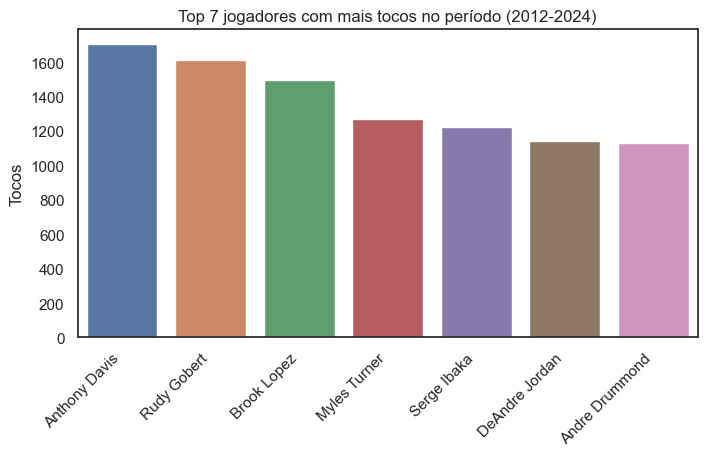

In [21]:
## visualização gráfica
fig, ax = plt.subplots(figsize = (8,4))
sns.set_theme(style = 'white')

ax = sns.barplot(data = df_tocos, x = df_tocos.index, y ='BLK', palette = 'deep')
ax.set_xlabel('')
ax.set_ylabel('Tocos')
ax.set_title('Top 7 jogadores com mais tocos no período (2012-2024)')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

ax
plt.show()

#### Top 7 jogadores com mais roubos de bola na temporada regular 2012-2024

In [22]:
## criação do dataset

df_roubos = df_regular.copy()

df_roubos = df_roubos.groupby('PLAYER')[['STL']].sum()

df_roubos.sort_values('STL', inplace = True, ascending = False)

df_roubos = df_roubos[0:7]

df_roubos

,STL
PLAYER,
Chris Paul,1452
Russell Westbrook,1364
James Harden,1363
Jimmy Butler,1312
Paul George,1294
Thaddeus Young,1204
Stephen Curry,1173


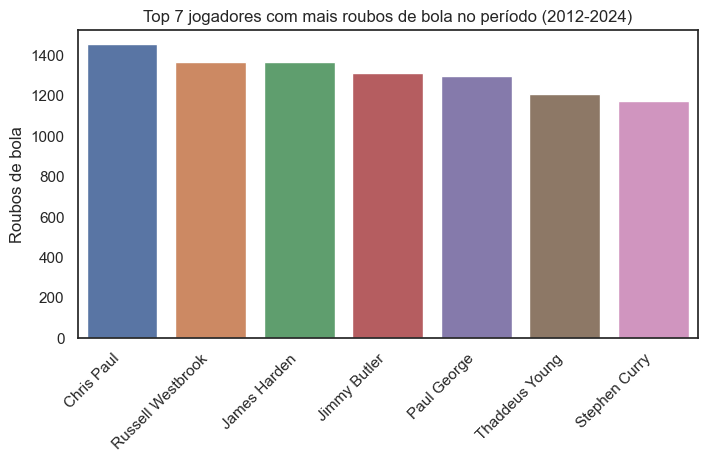

In [23]:
## visualização gráfica
fig, ax = plt.subplots(figsize = (8,4))
sns.set_theme(style = 'white')

ax = sns.barplot(data = df_roubos, x = df_roubos.index, y ='STL', palette = 'deep')
ax.set_xlabel('')
ax.set_ylabel('Roubos de bola')
ax.set_title('Top 7 jogadores com mais roubos de bola no período (2012-2024)')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

ax
plt.show()

Como o nosso objetivo inicial é verificar possíveis diferenças entre o desempenho dos jogadores na temporada regular e na fase de playoffs (que será analisada posteriormente) vale destacar os nomes que aparecem em mais de uma das estatísticas (PTS, REB, AST, BLK, STL) do jogo que estamos interessados. Nesse sentido citamos aqui os seguintes jogadores:

- James Harden: 3 aparições (PTS, AST, STL)
- Russell Westbrook: 3 aparições (PTS, AST, STL)
- Andre Drummond: 3 aparições (REB, BLK, GP)
- LeBron James: 2 aparições (PTS, AST)
- Damian Lillard : 2 aparições (PTS, AST)
- Stephen Curry: 2 aparições (PTS, STL)
- Chris Paul : 2 aparições (AST, STL)
- Rudy Gobert: 2 aparições (REB, BLK)
- DeAndre Jordan: 2 aparições (REB, BLK)
- Anthony Davis:  2 aparições (REB, BLK)
- DeMar DeRozan: 2 aparições (PTS, GP)
- Jonas Valanciunas	: 2 aparições (REB, GP)



Como mais um aspecto da nossa análise vamos verificar as médias de pontos, rebotes e assistências por jogo a fim de obter uma métrica de comparação em que a quantidade de jogos não tenha um peso tão grande. Para isso, vamos considerar pontos por jogo (PPG) como o fator mais importante e a partir dele obter os principais destaques da temporada regular.

#### Os maiores pontuadores por jogo na temporada regular

In [24]:
## Adicionando a coluno GP e PPG (PONTOS POR JOGO), APG (ASSISTÊNCIAS POR JOGO) E RPG (REBOTES POR JOGO)
df_pontos = df_regular.groupby('PLAYER')[['PTS','AST', 'REB', 'GP']].sum()

df_pontos.sort_values('PTS', inplace = True, ascending = False)

df_pontos = df_pontos[0:7]

df_pontos['PPG'] = df_pontos['PTS']/df_pontos['GP']
df_pontos['APG'] = df_pontos['AST']/df_pontos['GP']
df_pontos['RPG'] = df_pontos['REB']/df_pontos['GP']

df_pontos.sort_values('PPG', inplace = True, ascending = False)

df_pontos

,PTS,AST,REB,GP,PPG,APG,RPG
PLAYER,,,,,,,
Kevin Durant,18946,3572,4941,681,27.820852,5.245228,7.255507
James Harden,23090,7087,5266,852,27.100939,8.318075,6.180751
LeBron James,21429,6258,6242,803,26.686177,7.793275,7.773350
Stephen Curry,20513,5077,3779,776,26.434278,6.542526,4.869845
Damian Lillard,21151,5659,3573,842,25.119952,6.720903,4.243468
DeMar DeRozan,20456,4198,4161,888,23.036036,4.727477,4.685811
Russell Westbrook,19282,7349,6827,850,22.684706,8.645882,8.031765


Vemos que os principais pontuadores por jogo são __Kevin Durant__, __James Harden__, __Lebron James__  e __Stephen Curry__ . Além disso,  estes números nos dão uma noção do impacto destes jogadores durante a temporada regular em outros aspectos do jogo como assistências e rebotes. Podemos ver, por exemplo, como alguns deles impactam em mais de um aspecto do jogo como __Russell Westbrook__ e  __Lebron James__ com médias próximas de triplo-duplo assim como __Giannis Antetokounmpo__ e __Anthony Davis__ com médias de duplo-duplo. Outros jogadores com destaque são __Kevin Durant__, __James Harden__ e __Stephen Curry__.

## Analisando a fase de playoffs

Nessa seção vamos analisar apenas a fase de playoffs. Aqui a intenção é verificar o impacto dos jogadores nesta fase e comparar com os resultados da seção anterior. Desse modo, assim como na seção anterior vamos olhar principalmente para a quantidade de jogos, pontos, rebotes, assistências, roubos de bola e tocos.

#### Estatística descritiva da base de dados
Como primeiro passo vamos olhar as estatística da base de dados da temporada regular.

In [25]:
df_playoffs.describe()

,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,...,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
count,2576.000000,2576.000000,2576.000000,2576.000000,2576.000000,2576.000000,2576.000000,2576.000000,2576.000000,2576.000000,...,2576.000000,2576.000000,2576.000000,2576.000000,2576.000000,2576.000000,2576.000000,2576.00000,2576.000000,2576.000000
mean,8.279891,188.619177,29.670419,65.589674,0.414561,8.246506,23.317935,0.250523,13.963121,18.137811,...,33.380823,17.041149,5.525233,3.681289,9.783385,16.467391,81.550466,91.30163,1.462613,0.586518
std,5.725677,194.339256,37.758287,80.555907,0.181784,12.369591,32.723606,0.215531,21.712611,27.130594,...,40.232371,26.190917,7.005861,5.824399,12.952297,16.065706,104.831018,114.02784,1.425455,0.708155
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.00000,0.000000,0.000000
25%,4.000000,38.000000,4.000000,10.000000,0.350000,0.000000,1.000000,0.000000,1.000000,2.000000,...,6.000000,2.000000,1.000000,0.000000,1.000000,4.000000,10.000000,12.00000,0.430000,0.000000
50%,6.000000,131.500000,17.000000,39.000000,0.431000,3.000000,11.000000,0.289000,6.000000,8.000000,...,20.000000,7.000000,3.000000,1.000000,5.000000,12.000000,46.000000,54.00000,1.220000,0.430000
75%,12.000000,259.250000,40.000000,86.000000,0.500000,11.000000,31.250000,0.388000,17.000000,23.000000,...,45.000000,20.000000,8.000000,5.000000,13.000000,24.000000,108.000000,119.00000,2.040000,0.800000
max,24.000000,983.000000,275.000000,544.000000,1.000000,98.000000,244.000000,1.000000,191.000000,216.000000,...,269.000000,199.000000,49.000000,50.000000,100.000000,96.000000,748.000000,816.00000,17.000000,8.000000


Histogramas:

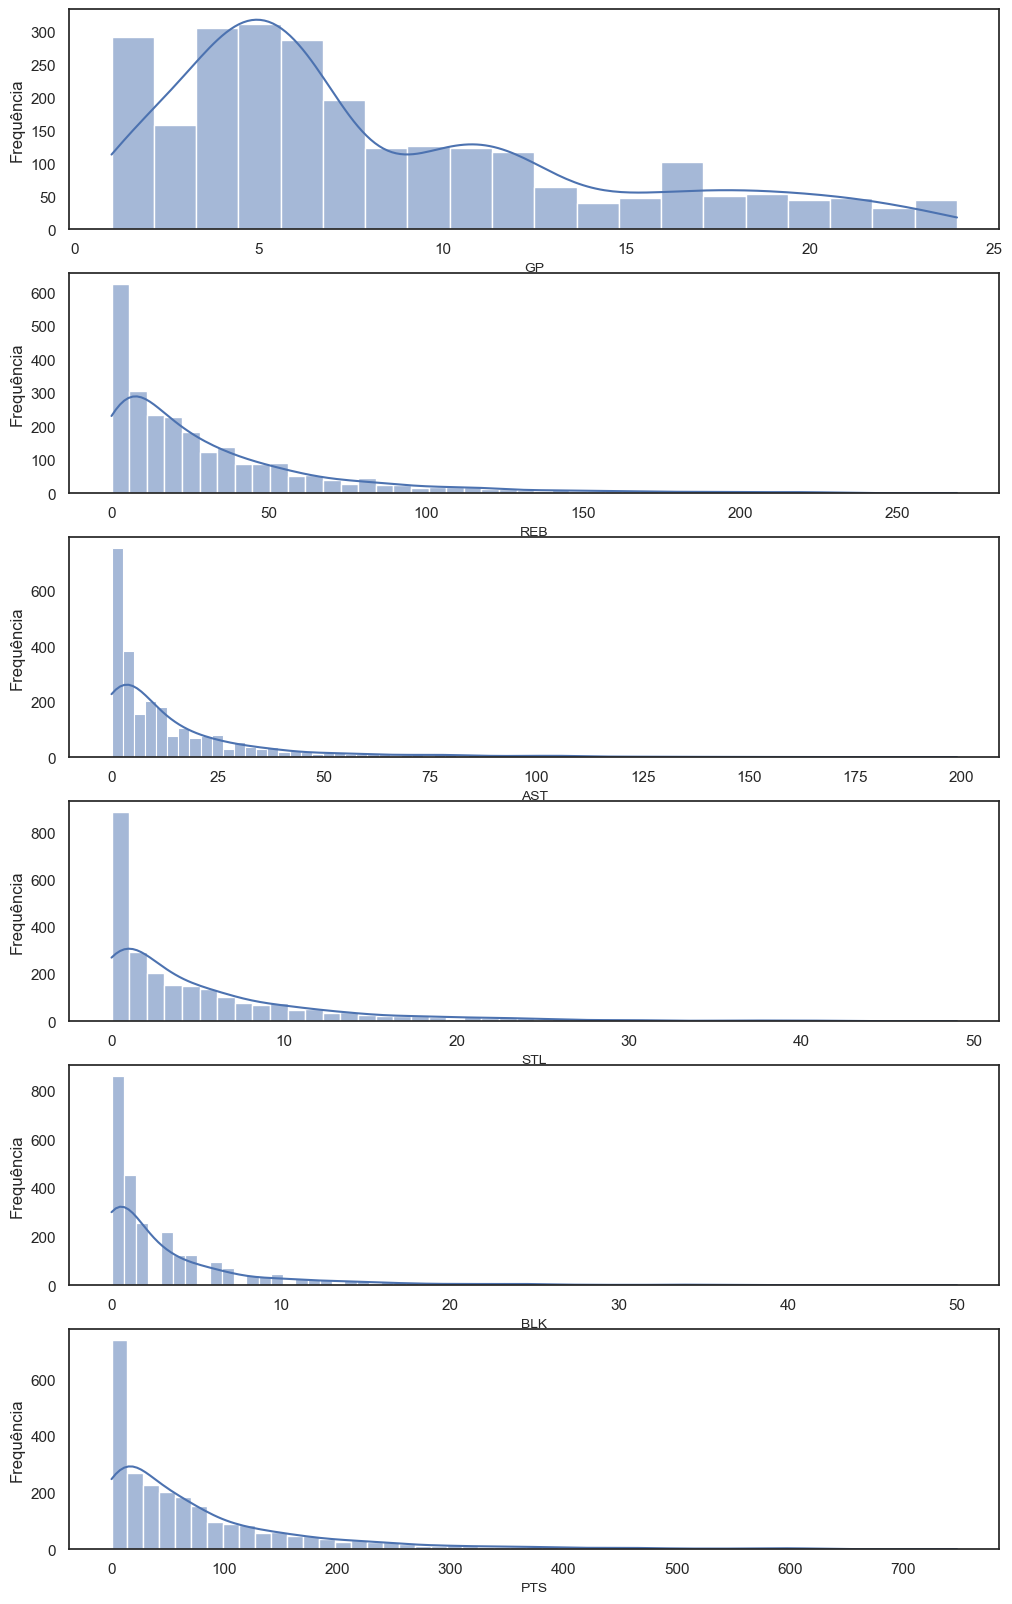

In [26]:
# Colunas de nosso interesse
cols_int = ['GP','REB', 'AST', 'STL', 'BLK', 'PTS' ]

# Configurar o tamanho da figura
plt.figure(figsize=(12, 20))

# Loop para plotar histogramas
for i, col in enumerate(cols_int):
    plt.subplot(len(cols_int), 1, i + 1)  # Cria subplots para cada histograma
    sns.histplot(df_playoffs[col], kde=True)  # Usando seaborn para criar histogramas com a curva KDE
    plt.xlabel(col, size = 10)
    plt.ylabel('Frequência')

# Mostrar o gráfico
plt.show()


Inicialmente vemos que na fase de playoffs os histogramas não mudam muito exceto os de GP (partidas jogadas). Para ele vemos uma grande quantidade de jogadores com poucas partidas jogadas o que é esperado por se tratar de uma fase de eliminação e também por se tratar de uma fase decisiva, logo, é esperado que nesse momento uma quantidade menor de jogadores de fato entrem em quadra.

Após essa rápida análise vamos prosseguir com a análise verificando quais os principais jogadores da fase de playoffs em cada uma das estatísticas que estamos interessados.

#### Top 7 jogadores em partidas jogadas nos playoffs (2012-2024)

In [27]:
## criação do dataset
df_jogos = df_playoffs.copy()

df_jogos = df_jogos.groupby('PLAYER')[['GP']].sum()

df_jogos.sort_values('GP', inplace = True, ascending = False)

df_jogos = df_jogos[0:7]

df_jogos

,GP
PLAYER,
LeBron James,172
Klay Thompson,158
Draymond Green,157
Danny Green,151
Stephen Curry,147
Al Horford,144
Andre Iguodala,142


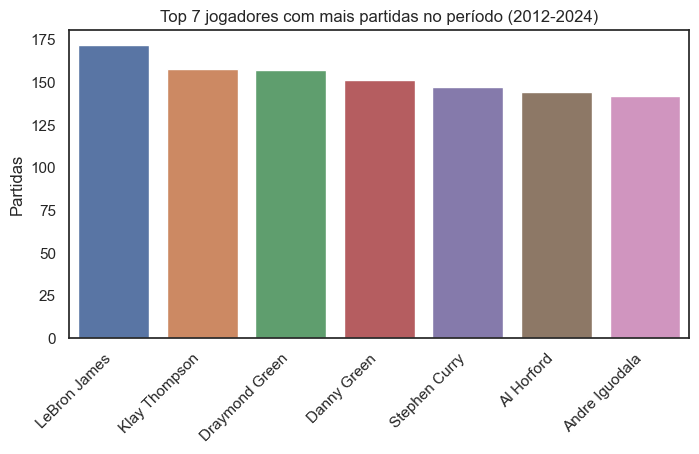

In [28]:
## visualização gráfica

fig, ax = plt.subplots(figsize = (8,4))
sns.set_theme(style = 'white')

ax = sns.barplot(data = df_jogos, x = df_jogos.index, y ='GP', palette = 'deep')
ax.set_xlabel('')
ax.set_ylabel('Partidas')
ax.set_title('Top 7 jogadores com mais partidas no período (2012-2024)')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

ax

plt.show()

#### Top 7 jogadores em pontos nos playoffs (2012-2024)

In [29]:
## criação do dataset
df_pontos_offs = df_playoffs.copy()

df_pontos_offs = df_pontos_offs.groupby('PLAYER')[['PTS']].sum()

df_pontos_offs.sort_values('PTS', inplace = True, ascending = False)

df_pontos_offs = df_pontos_offs[0:7]

df_pontos_offs

,PTS
PLAYER,
LeBron James,4887
Stephen Curry,3966
Kevin Durant,3778
James Harden,3171
Klay Thompson,3032
Kawhi Leonard,2837
Jayson Tatum,2711


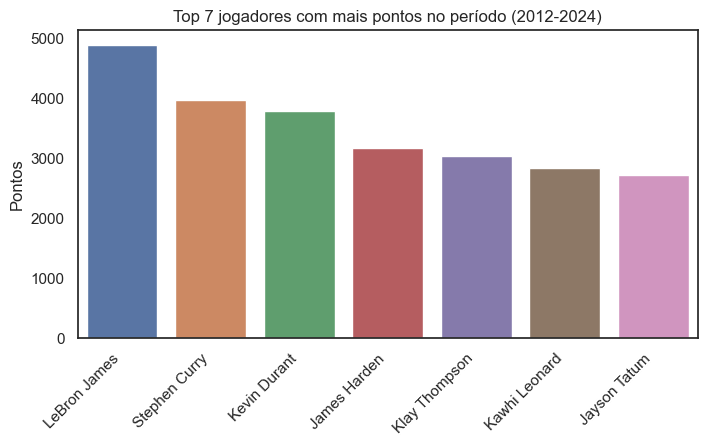

In [30]:
## visualização gráfica

fig, ax = plt.subplots(figsize = (8,4))
sns.set_theme(style = 'white')

ax = sns.barplot(data = df_pontos_offs, x = df_pontos_offs.index, y ='PTS', palette = 'deep')
ax.set_xlabel('')
ax.set_ylabel('Pontos')
ax.set_title('Top 7 jogadores com mais pontos no período (2012-2024)')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

ax

plt.show()

#### Top 7 jogadores em rebotes nos playoffs (2012-2024)

In [31]:
## criação do dataset

df_reb = df_playoffs.copy()

df_reb = df_reb.groupby('PLAYER')[['REB']].sum()

df_reb.sort_values('REB', inplace = True, ascending = False)

df_reb = df_reb[0:7]

df_reb

,REB
PLAYER,
LeBron James,1585
Draymond Green,1391
Al Horford,1131
Kawhi Leonard,1006
Kevin Durant,994
Nikola Jokic,981
Giannis Antetokounmpo,945


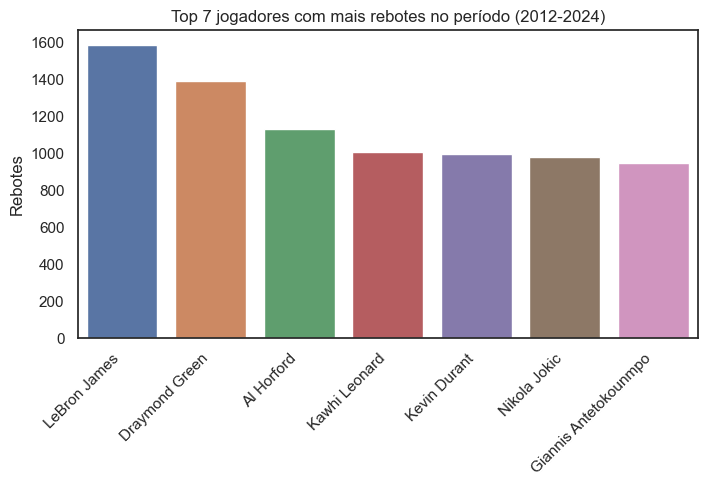

In [32]:
## visualização gráfica

fig, ax = plt.subplots(figsize = (8,4))
sns.set_theme(style = 'white')

ax = sns.barplot(data = df_reb, x = df_reb.index, y ='REB', palette = 'deep')
ax.set_xlabel('')
ax.set_ylabel('Rebotes')
ax.set_title('Top 7 jogadores com mais rebotes no período (2012-2024)')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

ax

plt.show()

#### Top 7 jogadores em assistências nos playoffs (2012-2024)

In [33]:
## criação do dataset

df_ast = df_playoffs.copy()

df_ast = df_ast.groupby('PLAYER')[['AST']].sum()

df_ast.sort_values('AST', inplace = True, ascending = False)

df_ast = df_ast[0:7]

df_ast

,AST
PLAYER,
LeBron James,1295
Draymond Green,974
James Harden,921
Stephen Curry,912
Chris Paul,890
Kyle Lowry,698
Russell Westbrook,660


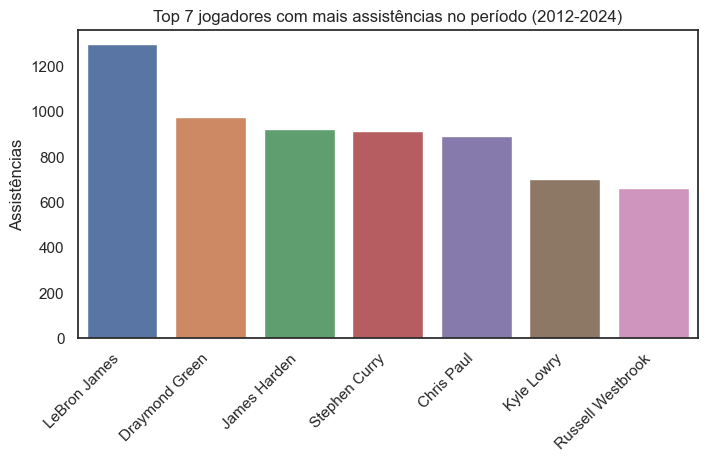

In [34]:
## visualização gráfica

fig, ax = plt.subplots(figsize = (8,4))
sns.set_theme(style = 'white')

ax = sns.barplot(data = df_ast, x = df_ast.index, y ='AST', palette = 'deep')
ax.set_xlabel('')
ax.set_ylabel('Assistências')
ax.set_title('Top 7 jogadores com mais assistências no período (2012-2024)')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

ax

plt.show()

#### Top 7 jogadores em tocos nos playoffs (2012-2024)

In [35]:
## criação do dataset

df_tocos = df_playoffs.copy()

df_tocos = df_tocos.groupby('PLAYER')[['BLK']].sum()

df_tocos.sort_values('BLK', inplace = True, ascending = False)

df_tocos = df_tocos[0:7]

df_tocos

,BLK
PLAYER,
Draymond Green,214
Al Horford,181
Serge Ibaka,169
LeBron James,166
Kevin Durant,153
Brook Lopez,144
Anthony Davis,129


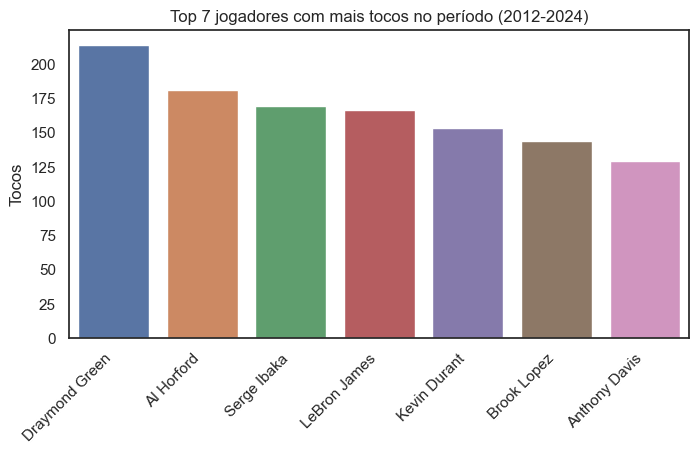

In [36]:
## visualização gráfica

fig, ax = plt.subplots(figsize = (8,4))
sns.set_theme(style = 'white')

ax = sns.barplot(data = df_tocos, x = df_tocos.index, y ='BLK', palette = 'deep')
ax.set_xlabel('')
ax.set_ylabel('Tocos')
ax.set_title('Top 7 jogadores com mais tocos no período (2012-2024)')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

ax

plt.show()

#### Top 7 jogadores em roubos de bola nos playoffs (2012-2024)

In [37]:
## criação do dataset

df_roubos = df_playoffs.copy()

df_roubos = df_roubos.groupby('PLAYER')[['STL']].sum()

df_roubos.sort_values('STL', inplace = True, ascending = False)

df_roubos = df_roubos[0:7]

df_roubos

,STL
PLAYER,
LeBron James,288
Draymond Green,240
Kawhi Leonard,231
Stephen Curry,223
James Harden,215
Chris Paul,210
Jimmy Butler,203


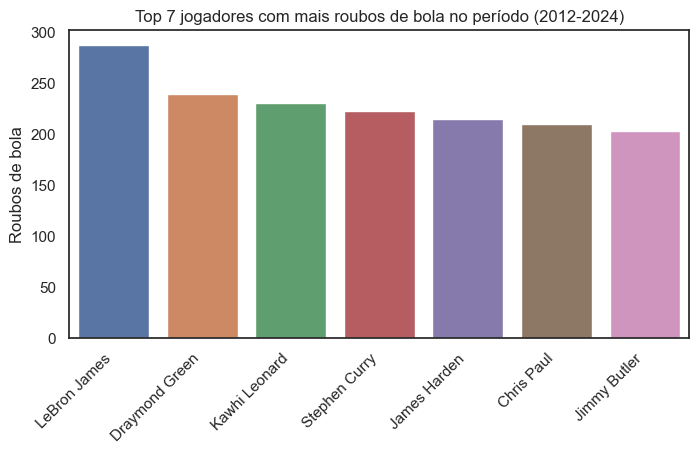

In [38]:
## visualização gráfica

fig, ax = plt.subplots(figsize = (8,4))
sns.set_theme(style = 'white')

ax = sns.barplot(data = df_roubos, x = df_roubos.index, y ='STL', palette = 'deep')
ax.set_xlabel('')
ax.set_ylabel('Roubos de bola')
ax.set_title('Top 7 jogadores com mais roubos de bola no período (2012-2024)')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

ax

plt.show()

Assim como fizemos para a fase da temporada regular, vamos destacar os nomes dos jogadores que aparecem em mais de uma estatística (PTS, REB, AST, BLK, STL). Com isso, vamos ver quais deles se repetem com relação ao encontrado na temporada regular:

- LeBron James: 6 aparições (PTS*, AST*, REB*, BLK, STL*, GP*)
- Draymond Green: 5 aparições (REB, AST, BLK*, STL, GP)
- Stephen Curry: 4 aparições (PTS, AST, STL, GP)
- Kevin Durant: 3 aparições (PTS, REB, BLK)
- James Harden : 3 aparições (PTS, AST, STL)
- Kawhi Leonard: 3 aparições (PTS, REB ,STL)
- Al Horford : 3 aparições (REB, BLK, GP)
- Klay Thompson: 2 aparições (PTS, GP)
- Chris Paul: 2 aparições (AST, STL)
- DeAndre Jordan: 2 aparições (REB, BLK)
- Anthony Davis:  2 aparições (REB, BLK)

obs : * = Lider da estatística




Alguns casos chamam a atenção aqui. Primeiramente temos o caso de __LeBron James__ que enquanto na temporada regular aparece no top-7 em 2 estatísticas, nos playoffs aparece em todas as 6 das quais lidera em 5. Isso mostra o crescimento do jogador nessa fase. Um outro caso bastante impressionante é o de __Draymond Green__ que não aparece no top-7 em nenhuma estatística na temporada regular para 5 onde lidera em 1, sendo o único jogador além de LeBron James a liderar uma estatística. __Kevin Durant__, __Kawhi Leonard__ e __Al Horford__ também se mostram decisivos saindo de nenhuma aparição na temporada regular para 3 nos playoffs enquanto o __Stephen Curry Curry__ também mostra melhora saindo de 2 para 4.

Por outro lado, jogadores como __Russell Westbrook__ e __Damian Lillard__ acabam saindo do destaque. No caso do __Russell Westbrook__ ele sai de 3 estatísticas figurando no top 7 da temporada regular para apenas 1 durante os playoffs.

Assim com feito na temporada regular, vamos verificar as médias de pontos, rebotes e assistências por jogo a fim de obter uma métrica de comparação em que a quantidade de jogos não tenha um peso tão grande. Para isso, vamos considerar pontos por jogo (PPG) como o fator mais importante e a partir dele obter os principais destaques dos playoffs e comparar este resultado com o obtido anteriormente.

#### Os maiores pontuadores por jogo na fase de playoffs

In [39]:
## Adicionando a coluno GP e PPG (PONTOS POR JOGO), APG (ASSISTÊNCIAS POR JOGO) E RPG (REBOTES POR JOGO)
df_pontos_playoffs= df_playoffs.groupby('PLAYER')[['PTS','AST', 'REB', 'GP']].sum()

df_pontos_playoffs.sort_values('PTS', inplace = True, ascending = False)

df_pontos_playoffs = df_pontos_playoffs[0:7]

df_pontos_playoffs['PPG'] = df_pontos_playoffs['PTS']/df_pontos_playoffs['GP']
df_pontos_playoffs['APG'] = df_pontos_playoffs['AST']/df_pontos_playoffs['GP']
df_pontos_playoffs['RPG'] = df_pontos_playoffs['REB']/df_pontos_playoffs['GP']

df_pontos_playoffs.sort_values('PPG', inplace = True, ascending = False)

df_pontos_playoffs

,PTS,AST,REB,GP,PPG,APG,RPG
PLAYER,,,,,,,
Kevin Durant,3778,573,994,127,29.748031,4.511811,7.826772
LeBron James,4887,1295,1585,172,28.412791,7.529070,9.215116
Stephen Curry,3966,912,786,147,26.979592,6.204082,5.346939
James Harden,3171,921,702,123,25.780488,7.487805,5.707317
Jayson Tatum,2711,549,897,113,23.991150,4.858407,7.938053
Kawhi Leonard,2837,391,1006,125,22.696000,3.128000,8.048000
Klay Thompson,3032,351,626,158,19.189873,2.221519,3.962025


Vemos que os principais pontuadores por jogo são __Kevin Durant__, __Lebron James__, __Stephen Curry__ e  __James Harden__. Note que estes são jogadores que também figuraram no top 4 de pontuadores por jogo na temporada regular. Como maneira de comparar a diferença de impacto deles nas duas fases do campeonato vamos analisar com mais cuidado PPG, APG e RPG e verificar qual deles aumenta, diminui ou se mantém constante em relação a números.

Outro ponto importante a ser notado é a diferença entre os outros integrantes do top 7. Enquanto na temporada regular temos __Damian Lillard__, __DeMar DeRozan__ e __Russell Westbrook__ com ótimos números, na fase de playoffs aparecem __Jayson Tatum__, __Kawhi Leonard__ e __Klay Thompson__. Destaque especial para __Jayson Tatum__ que entrou na NBA na temporada 2017-18 e já figura entre os principais jogadores na fase de playoffs.

#### Comparação entre o desempenho na temporada regular e playoffs

In [40]:
## Criando um df para merger 
df_pontos_playoffs_concat = df_pontos_playoffs.copy()
df_pontos_playoffs_concat = df_pontos_playoffs_concat[['PPG', 'APG', 'RPG']]
df_pontos_playoffs_concat.rename(columns={'PPG': 'PPG-offs', 'APG': 'APG-offs', 'RPG': 'RPG-offs'}, inplace = True)

df_pontos_playoffs_concat.head()

,PPG-offs,APG-offs,RPG-offs
PLAYER,,,
Kevin Durant,29.748031,4.511811,7.826772
LeBron James,28.412791,7.529070,9.215116
Stephen Curry,26.979592,6.204082,5.346939
James Harden,25.780488,7.487805,5.707317
Jayson Tatum,23.991150,4.858407,7.938053


In [41]:
## Criando um df para merger
df_pontos_concat = df_pontos.copy()
df_pontos_concat = df_pontos_concat[['PPG', 'APG', 'RPG']]

df_pontos_concat.head()

,PPG,APG,RPG
PLAYER,,,
Kevin Durant,27.820852,5.245228,7.255507
James Harden,27.100939,8.318075,6.180751
LeBron James,26.686177,7.793275,7.773350
Stephen Curry,26.434278,6.542526,4.869845
Damian Lillard,25.119952,6.720903,4.243468


In [42]:
## Fazendo um merger entre os dois dfs 
df_merged = pd.merge(df_pontos_concat, df_pontos_playoffs_concat, on='PLAYER')

df_merged

,PPG,APG,RPG,PPG-offs,APG-offs,RPG-offs
PLAYER,,,,,,
Kevin Durant,27.820852,5.245228,7.255507,29.748031,4.511811,7.826772
James Harden,27.100939,8.318075,6.180751,25.780488,7.487805,5.707317
LeBron James,26.686177,7.793275,7.773350,28.412791,7.529070,9.215116
Stephen Curry,26.434278,6.542526,4.869845,26.979592,6.204082,5.346939


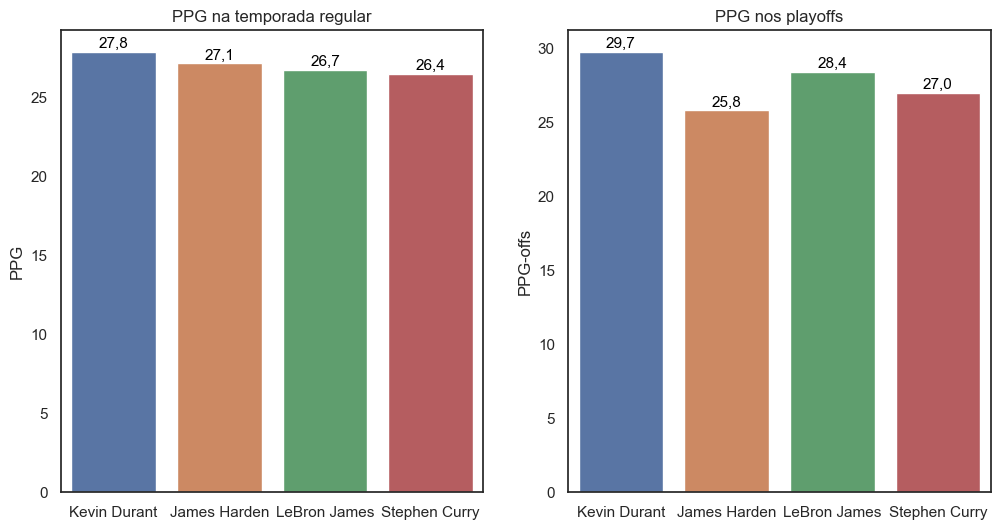

In [43]:
import matplotlib.ticker as ticker

# Criando a figura e os subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Gráfico de barras do primeiro DataFrame
sns.barplot(ax=axes[0], data=df_merged, x = df_merged.index, y='PPG')
axes[0].set_title('PPG na temporada regular')
axes[0].set_xlabel('')

# Adicionando rótulos de valor nas barras
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height():,.1f}'.replace(',', 'X').replace('.', ',').replace('X', '.'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=11, color='black', xytext=(0, 3),
                textcoords='offset points')
    
# Gráfico de barras do segundo DataFrame
sns.barplot(ax=axes[1], data=df_merged, x = df_merged.index, y='PPG-offs')
axes[1].set_title('PPG nos playoffs')
axes[1].set_xlabel('')

# Adicionando rótulos de valor nas barras
for p in axes[1].patches:
    axes[1].annotate(f'{p.get_height():,.1f}'.replace(',', 'X').replace('.', ',').replace('X', '.'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=11, color='black', xytext=(0, 3),
                textcoords='offset points')

# Mostrar o gráfico
plt.show()


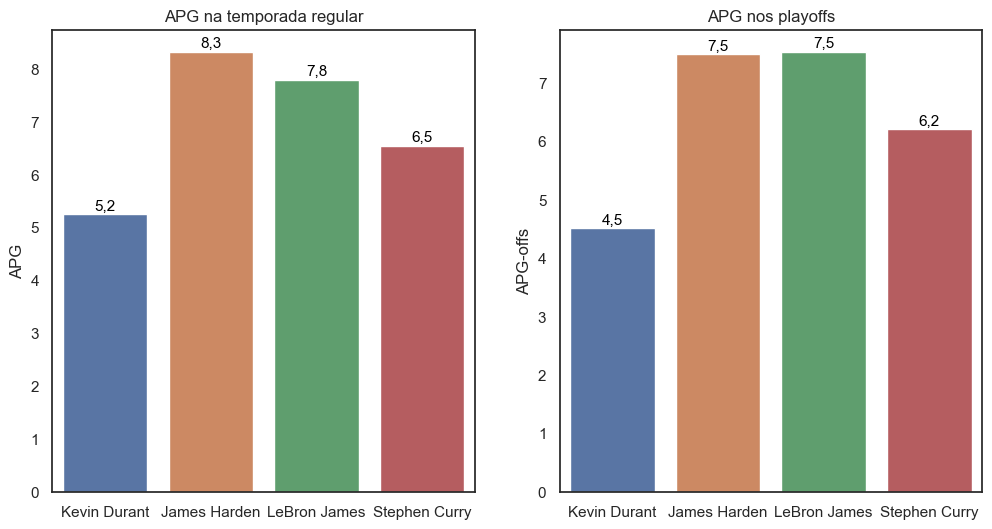

In [44]:
# Criando a figura e os subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Gráfico de barras do primeiro DataFrame
sns.barplot(ax=axes[0], data=df_merged, x = df_merged.index, y='APG')
axes[0].set_title('APG na temporada regular')
axes[0].set_xlabel('')

# Adicionando rótulos de valor nas barras
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height():,.1f}'.replace(',', 'X').replace('.', ',').replace('X', '.'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=11, color='black', xytext=(0, 3),
                textcoords='offset points')
    
# Gráfico de barras do segundo DataFrame
sns.barplot(ax=axes[1], data=df_merged, x = df_merged.index, y='APG-offs')
axes[1].set_title('APG nos playoffs')
axes[1].set_xlabel('')

# Adicionando rótulos de valor nas barras
for p in axes[1].patches:
    axes[1].annotate(f'{p.get_height():,.1f}'.replace(',', 'X').replace('.', ',').replace('X', '.'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=11, color='black', xytext=(0, 3),
                textcoords='offset points')

# Mostrar o gráfico
plt.show()


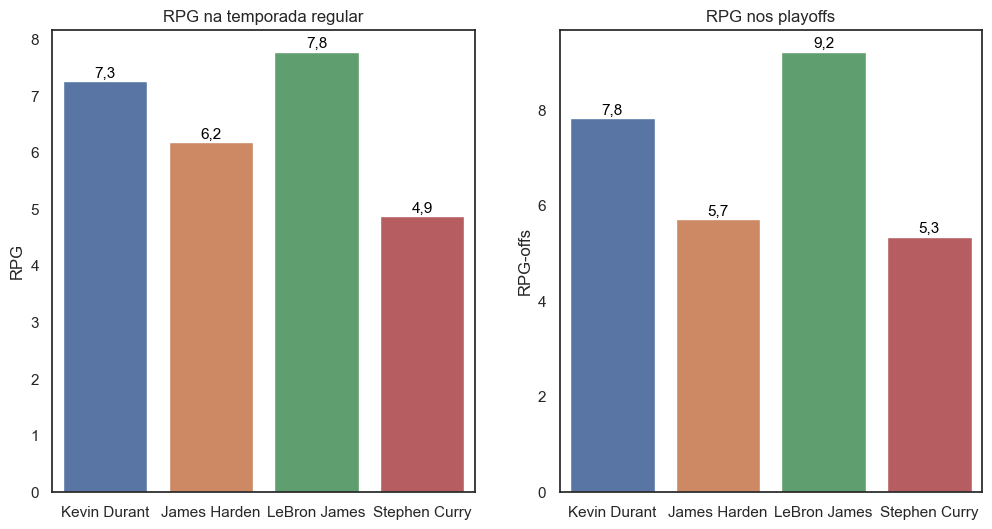

In [45]:
# Criando a figura e os subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Gráfico de barras do primeiro DataFrame
sns.barplot(ax=axes[0], data=df_merged, x = df_merged.index, y='RPG')
axes[0].set_title('RPG na temporada regular')
axes[0].set_xlabel('')

# Adicionando rótulos de valor nas barras
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height():,.1f}'.replace(',', 'X').replace('.', ',').replace('X', '.'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=11, color='black', xytext=(0, 3),
                textcoords='offset points')
    
# Gráfico de barras do segundo DataFrame
sns.barplot(ax=axes[1], data=df_merged, x = df_merged.index, y='RPG-offs')
axes[1].set_title('RPG nos playoffs')
axes[1].set_xlabel('')

# Adicionando rótulos de valor nas barras
for p in axes[1].patches:
    axes[1].annotate(f'{p.get_height():,.1f}'.replace(',', 'X').replace('.', ',').replace('X', '.'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=11, color='black', xytext=(0, 3),
                textcoords='offset points')

# Mostrar o gráfico
plt.show()


Vemos que em relação a pontos por jogo o maior aumento acontece com __Kevin Durant__ e __LeBron James__, enquanto __Stephen Curry__ mantém-se aproximadamente constante e James Harden tem um decréscimo significativo. Para assistências __Kevin Durant__ e __James Harden__ possuem as quedas mais siginificativas, enquanto __Stephen Curry__ e __LeBron James__ mantém-se aproximadamente com os mesmos números. Para rebotes por jogo vemos um grande aumento nos números de __LeBron James__, já __Stephen Curry__ e __Kevin Durant__ mantém números parecidos com os da temporada regular, por outro lado, vemos um queda no desempenho de __James Harden__ neste quesito.

Por fim, vemos que de maneira geral a principal queda de desempenho entre os jogadores analisados é de __James Harden__. Enquanto __LeBron James__, __Kevin Durant__ e __Stephen Curry__ tem uma melhora em seu desempenho.

# Os dois maiores da geração: LeBron James e Stephen Curry

#### LeBron James
Como primeiro nome vamos analisar o desempenho do Lebron James ao longo do período (2012-2024). O objetivo neste ponto é verificar o impacto do mesmo ao longo das temporadas.

In [46]:
## dados Lebron durante as ultimas temporadas regulares
df_lebron = df.copy()

df_lebron = df.query('Season_type == "Regular%20Season" and PLAYER == "LeBron James"')[['year', 'TEAM', 'GP', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', "FT_PCT", 'BLK', 'PF', 'PTS', 'AST', 'REB']]

df_lebron['PPG'] = df_lebron['PTS']/df_lebron['GP']
df_lebron['APG'] = df_lebron['AST']/df_lebron['GP']
df_lebron['RPG'] = df_lebron['REB']/df_lebron['GP']

df_lebron.reset_index(drop = True, inplace = True)

df_lebron

,year,TEAM,GP,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FT_PCT,BLK,PF,PTS,AST,REB,PPG,APG,RPG
0,2012-13,MIA,76,765,1354,0.565,103,254,0.406,403,0.753,67,110,2036,551,610,26.789474,7.250000,8.026316
1,2013-14,MIA,77,767,1353,0.567,116,306,0.379,439,0.750,26,126,2089,488,533,27.129870,6.337662,6.922078
2,2014-15,CLE,69,624,1279,0.488,120,339,0.354,375,0.710,49,135,1743,511,416,25.260870,7.405797,6.028986
3,2015-16,CLE,76,737,1416,0.520,87,282,0.309,359,0.731,49,143,1920,514,565,25.263158,6.763158,7.434211
4,2016-17,CLE,74,736,1344,0.548,124,342,0.363,358,0.674,44,134,1954,646,639,26.405405,8.729730,8.635135
5,2017-18,CLE,82,857,1580,0.542,149,406,0.367,388,0.731,71,136,2251,747,709,27.451220,9.109756,8.646341
6,2018-19,LAL,55,558,1095,0.510,111,327,0.339,278,0.665,33,94,1505,454,465,27.363636,8.254545,8.454545
7,2019-20,LAL,67,643,1303,0.493,148,425,0.348,264,0.693,36,118,1698,684,525,25.343284,10.208955,7.835821
8,2020-21,LAL,45,422,823,0.513,104,285,0.365,178,0.698,25,70,1126,350,346,25.022222,7.777778,7.688889
9,2021-22,LAL,56,640,1221,0.524,161,448,0.359,254,0.756,59,121,1695,349,459,30.267857,6.232143,8.196429


In [47]:
## dados Lebron durante as ultimas temporadas de playoffs
df_lebron_offs = df.copy()

df_lebron_offs = df.query('Season_type == "Playoffs" and PLAYER == "LeBron James"')[['year', 'TEAM', 'GP', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', "FT_PCT", 'BLK', 'PF', 'PTS', 'AST', 'REB']]

df_lebron_offs['PPG'] = df_lebron_offs['PTS']/df_lebron_offs['GP']
df_lebron_offs['APG'] = df_lebron_offs['AST']/df_lebron_offs['GP']
df_lebron_offs['RPG'] = df_lebron_offs['REB']/df_lebron_offs['GP']

df_lebron_offs.reset_index(drop = True, inplace = True)

df_lebron_offs

,year,TEAM,GP,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FT_PCT,BLK,PF,PTS,AST,REB,PPG,APG,RPG
0,2012-13,MIA,23,212,432,0.491,36,96,0.375,136,0.777,18,43,596,152,193,25.913043,6.608696,8.391304
1,2013-14,MIA,20,192,340,0.565,35,86,0.407,129,0.806,11,46,548,95,141,27.400000,4.750000,7.050000
2,2014-15,CLE,20,227,544,0.417,25,110,0.227,122,0.731,21,58,601,169,226,30.050000,8.450000,11.300000
3,2015-16,CLE,21,219,417,0.525,32,94,0.340,82,0.661,27,54,552,160,200,26.285714,7.619048,9.523810
4,2016-17,CLE,18,217,384,0.565,44,107,0.411,113,0.698,23,43,591,141,164,32.833333,7.833333,9.111111
5,2017-18,CLE,22,275,510,0.539,39,114,0.342,159,0.746,23,52,748,198,200,34.000000,9.000000,9.090909
6,2019-20,LAL,21,214,382,0.560,44,119,0.370,108,0.720,18,40,580,184,226,27.619048,8.761905,10.761905
7,2020-21,LAL,6,54,114,0.474,18,48,0.375,14,0.609,2,7,140,48,43,23.333333,8.000000,7.166667
8,2022-23,LAL,16,147,295,0.498,28,106,0.264,70,0.761,18,28,392,104,158,24.500000,6.500000,9.875000
9,2023-24,LAL,5,56,99,0.566,10,26,0.385,17,0.739,5,11,139,44,34,27.800000,8.800000,6.800000


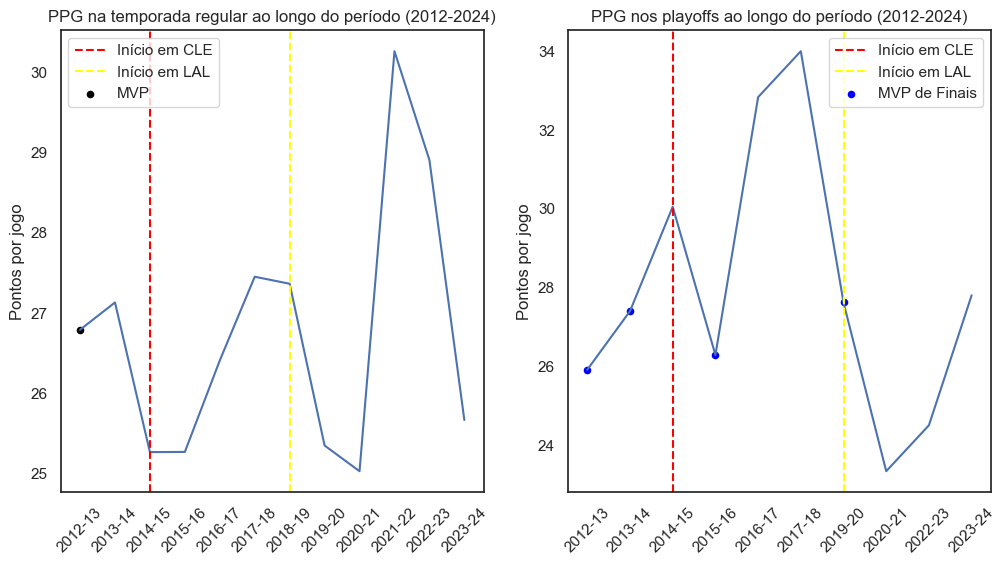

In [68]:
# Criando a figura e os subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Gráfico de barras do primeiro DataFrame
sns.lineplot(ax=axes[0], data =df_lebron, x = 'year', y='PPG')
axes[0].set_title('PPG na temporada regular')
axes[0].set_xlabel('')

# Adicionando as linhas 
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation = 45)
axes[0].set_xlabel('')
axes[0].set_ylabel('Pontos por jogo')
axes[0].set_title('PPG na temporada regular ao longo do período (2012-2024)')
axes[0].axvline(x = 2, color='red', linestyle='--', label='Início em CLE')
axes[0].axvline(x = 6, color='yellow', linestyle='--', label='Início em LAL')
    
# Gráfico de barras do segundo DataFrame
sns.lineplot(ax=axes[1], data =df_lebron_offs, x = 'year', y='PPG')
axes[1].set_title('PPG nos playoffs')
axes[1].set_xlabel('')

# Adicionando as linhas
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation = 45)
axes[1].set_xlabel('')
axes[1].set_ylabel('Pontos por jogo')
axes[1].set_title('PPG nos playoffs ao longo do período (2012-2024)')
axes[1].axvline(x = 2, color='red', linestyle='--', label='Início em CLE')
axes[1].axvline(x = 6, color='yellow', linestyle='--', label='Início em LAL')

# Adicionando um ponto específico
axes[0].scatter(df_lebron.loc[0, 'year'], df_lebron.loc[0, 'PPG'], color='black', s = 20, label='MVP')
axes[1].scatter(df_lebron_offs.loc[0, 'year'], df_lebron_offs.loc[0, 'PPG'], color='blue', s = 20, label='MVP de Finais')
axes[1].scatter(df_lebron_offs.loc[1, 'year'], df_lebron_offs.loc[1, 'PPG'], color='blue', s = 20)
axes[1].scatter(df_lebron_offs.loc[3, 'year'], df_lebron_offs.loc[3, 'PPG'], color='blue', s = 20)
axes[1].scatter(df_lebron_offs.loc[6, 'year'], df_lebron_offs.loc[6, 'PPG'], color='blue', s = 20)

# Adicionando a legenda
axes[0].legend()
axes[1].legend()

# Mostrar o gráfico
plt.show()


As linhas pontilhadas vermelha e amarela mostram o fim das passagens do jogador pelo Miami Heat e pelo Cleveland Cavaliers, respectivamente. 

- Temporada regular : Na temporada regular 2012-13 ele conquista o MVP da temporada regular (representado no gráfico pelo ponto preto) apesar de não ser sua melhor temporada em PPG. A temporada regular com sua melhor marca neste quesito (30.25 PPG) é a 2021-22 pelo Lakers. Em contraste, sua pior temporada regular (25.01 PPG) também é pelo Lakers em 2020-21**. Outro ponto a ser notado é a contínua queda em relação aos PPG nas últimas temporadas regulares (2022-2023 e 2023-2024).
- Playoffs: A análise anterior já nos mostrou que o desempenho do LeBron James aumenta durante a fase de playoffs. Os pontos azuis mostram os 4 títulos de MVP das finais, dois durante sua passagem no Miami Heat, um durante sua passagem no Cleveland Cavaliers e um pelo Lakers. A temporada com maior rendimento neste quesito é a temporada de 2017-2018 com impressionantes 34 PPG pelo Cleveland Cavaliers. Já sua pior pós-temporada foi a de 2020-21 pelo Lakers, um ano após título de 2019-20 onde ele obteve o título de MPV das finais.

** A temporada regular da NBA de 2020–21 teve um número reduzido de jogos (72 jogos) devido à pandemia de COVID-19.

O próximo passo dessa análise é ver como estão distribuídos esses pontos durante a temporada regular. Podemos fazer isso através do gráfico de pizza a seguir:

In [49]:
## criação do dataset
df_lebron_pts = df_regular.copy()

df_lebron_pts = df_lebron_pts.groupby('PLAYER')[['PTS', 'FGM', 'FG3M', 'FTM']].sum()

df_lebron_pts = df_lebron_pts.query('PLAYER == "LeBron James"')

df_lebron_pts['FG2M'] = df_lebron_pts['FGM'] - (df_lebron_pts['FG3M'] + df_lebron_pts['FTM'])

df_lebron_pts

,PTS,FGM,FG3M,FTM,FG2M
PLAYER,,,,,
LeBron James,21429,8043,1493,3850,2700


In [50]:
## criação do dataset
df_lebron_pts_offs = df_playoffs.copy()

df_lebron_pts_offs = df_lebron_pts_offs.groupby('PLAYER')[['PTS', 'FGM', 'FG3M', 'FTM']].sum()

df_lebron_pts_offs = df_lebron_pts_offs.query('PLAYER == "LeBron James"')

df_lebron_pts_offs['FG2M'] = df_lebron_pts_offs['FGM'] - (df_lebron_pts_offs['FG3M'] + df_lebron_pts_offs['FTM'])

df_lebron_pts_offs

,PTS,FGM,FG3M,FTM,FG2M
PLAYER,,,,,
LeBron James,4887,1813,311,950,552


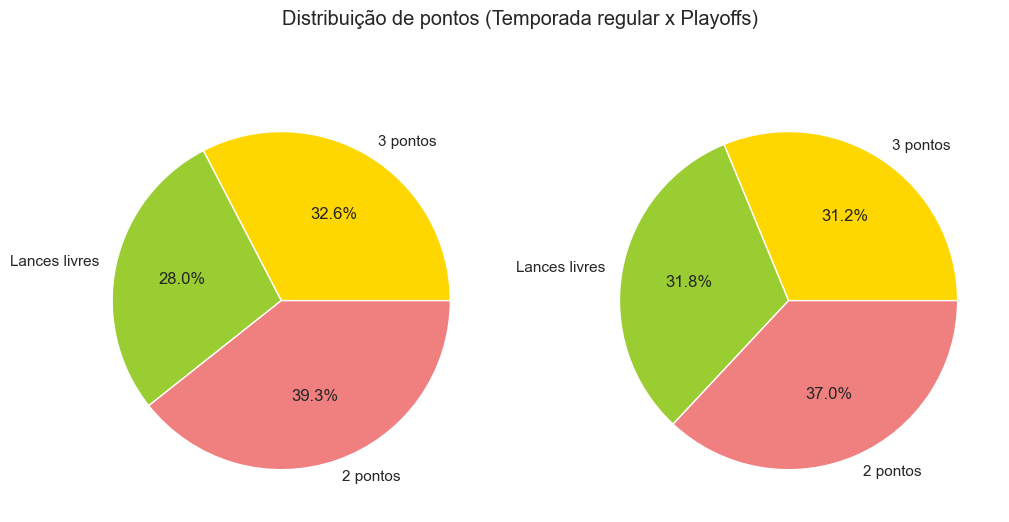

In [51]:
total_pontos = df_lebron_pts['PTS'].sum()

total_2pontos = 2 * df_lebron_pts['FG2M'].sum()
total_3pontos = 3 *df_lebron_pts['FG3M'].sum()
total_1ponto = df_lebron_pts['FTM'].sum()

total_pontos_offs = df_lebron_pts_offs['PTS'].sum()

total_2pontos_offs = 2 * df_lebron_pts_offs['FG2M'].sum()
total_3pontos_offs = 3 *df_lebron_pts_offs['FG3M'].sum()
total_1ponto_offs = df_lebron_pts_offs['FTM'].sum()

# Dados do gráfico
labels = ['3 pontos', 'Lances livres', '2 pontos']
sizes = [total_3pontos, total_1ponto, total_2pontos]
sizesoffs = [total_3pontos_offs, total_1ponto_offs, total_2pontos_offs]
colors = ['gold', 'yellowgreen', 'lightcoral']

# Criando a figura e os subplots
# Criando o gráfico de fatias
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
axes[0].pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%')
axes[1].pie(sizesoffs, labels=labels, colors=colors,
        autopct='%1.1f%%')

fig.suptitle('Distribuição de pontos (Temporada regular x Playoffs)')

plt.show()

Vemos que, como esperado, a maior parte da pontuação vem de cestas de 2 pontos. Isto era esperado dado que Lebron James não é conhecido por ser um exímio jogador da linhas de 3 pontos. Por outro lado, um dos seus principais atributos, a infiltração, lhe proporciona um alto volume de cestas de 2 pontos e lances livres. Estas características no seu jogo explicam os 67.3% dos seus pontos vindo desse modo.

Seguindo a análise vamos ver seu desempenho na geração de jogo para seus companheiros através das assistências por jogo. 

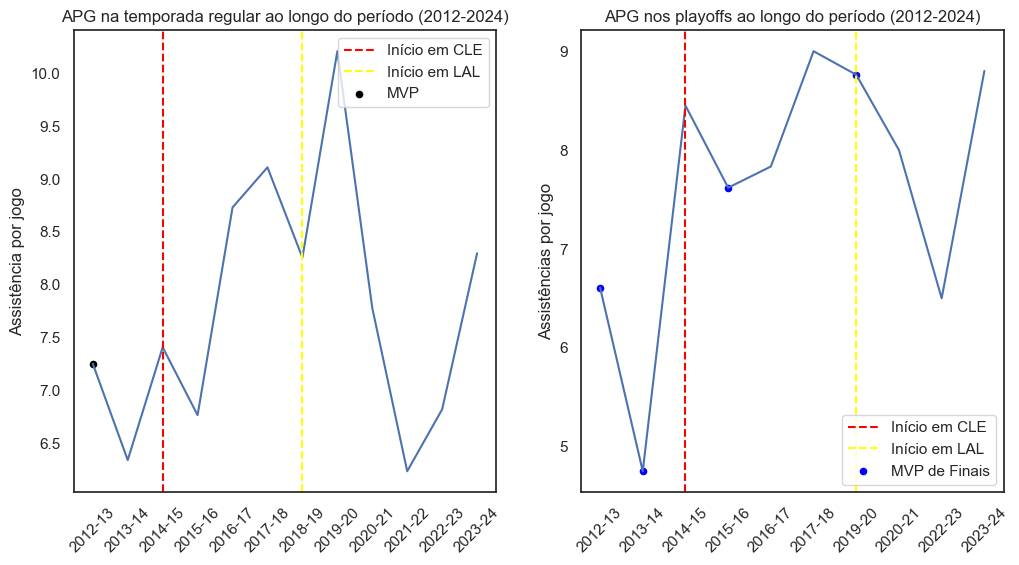

In [75]:
# Criando a figura e os subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Gráfico de barras do primeiro DataFrame
sns.lineplot(ax=axes[0], data =df_lebron, x = 'year', y='APG')
axes[0].set_title('APG na temporada regular')
axes[0].set_xlabel('')

# Adicionando as linhas 
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation = 45)
axes[0].set_xlabel('')
axes[0].set_ylabel('Assistência por jogo')
axes[0].set_title('APG na temporada regular ao longo do período (2012-2024)')
axes[0].axvline(x = 2, color='red', linestyle='--', label='Início em CLE')
axes[0].axvline(x = 6, color='yellow', linestyle='--', label='Início em LAL')
    
# Gráfico de barras do segundo DataFrame
sns.lineplot(ax=axes[1], data =df_lebron_offs, x = 'year', y='APG')
axes[1].set_title('APG nos playoffs')
axes[1].set_xlabel('')

# Adicionando as linhas
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation = 45)
axes[1].set_xlabel('')
axes[1].set_ylabel('Assistências por jogo')
axes[1].set_title('APG nos playoffs ao longo do período (2012-2024)')
axes[1].axvline(x = 2, color='red', linestyle='--', label='Início em CLE')
axes[1].axvline(x = 6, color='yellow', linestyle='--', label='Início em LAL')

# Adicionando um ponto específico
axes[0].scatter(df_lebron.loc[0, 'year'], df_lebron.loc[0, 'APG'], color='black', s = 20, label='MVP')
axes[1].scatter(df_lebron_offs.loc[0, 'year'], df_lebron_offs.loc[0, 'APG'], color='blue', s = 20, label='MVP de Finais')
axes[1].scatter(df_lebron_offs.loc[1, 'year'], df_lebron_offs.loc[1, 'APG'], color='blue', s = 20)
axes[1].scatter(df_lebron_offs.loc[3, 'year'], df_lebron_offs.loc[3, 'APG'], color='blue', s = 20)
axes[1].scatter(df_lebron_offs.loc[6, 'year'], df_lebron_offs.loc[6, 'APG'], color='blue', s = 20)

# Adicionando a legenda
axes[0].legend()
axes[1].legend()

# Mostrar o gráfico
plt.show()


 
- Temporada regular: Vemos aqui que a quantidade de assistências por jogo aumenta consideravelmente após a saída do Miami Heat. Após a temporada 2015-16 ele consegue um aumento considerável neste quesito durante sua passagem pelo Cleveland Cavaliers até o pico (10.2 APG) pelo Lakers na temporada 2019-20. Este pico acontece justamente na chegada do pivô Anthony Davis. Outro ponto importante é que a queda vertiginosa nas temporadas 2020-21 e 2021-22 acontecem justamente quando Anthony Davis fica fora por lesões, neste período ele participa apenas de 76 dos 164 jogos possíveis**. Nas duas últimas temporadas os números voltam a subir e podemos novamente fazer uma ligação com o número de jogos de Anthony Davis (132 dos 164 jogos possíveis). 

- Playoffs: Vemos um comportamente bem parecido com a temporada regular, com a quantidade de assistências por jogo aumento após sua saida do Miami Heat. Também podemos fazer uma relação entre sua queda em 2020-21 devido a ausência do seu principal companheiro de time Anthony Davis. 

** Fonte : https://www.espn.com.br/nba/jogador/estatisticas/_/id/6583/anthony-davis

Por fim, vamos analisar o impacto defensivo de Lebron James através das seguintes métricas: rebotes, tocos e roubadas de bola por jogo. A ideia é avaliar a sua evolução neste quesito ao longo das temporadas.

In [53]:
## criação do dataset
## dados Lebron durante as ultimas temporadas
df_lebron_def = df_regular.copy()

df_lebron_def = df_lebron_def.query('PLAYER == "LeBron James"')[['year', 'TEAM', 'GP', 'REB', 'BLK', 'STL', 'PF']]

df_lebron_def.reset_index(drop = True, inplace = True)

df_lebron_def['RPG'] = df_lebron_def['REB']/df_lebron_def['GP']
df_lebron_def['BPG'] = df_lebron_def['BLK']/df_lebron_def['GP']
df_lebron_def['SPG'] = df_lebron_def['STL']/df_lebron_def['GP']

df_lebron_def

,year,TEAM,GP,REB,BLK,STL,PF,RPG,BPG,SPG
0,2012-13,MIA,76,610,67,129,110,8.026316,0.881579,1.697368
1,2013-14,MIA,77,533,26,121,126,6.922078,0.337662,1.571429
2,2014-15,CLE,69,416,49,109,135,6.028986,0.710145,1.579710
3,2015-16,CLE,76,565,49,104,143,7.434211,0.644737,1.368421
4,2016-17,CLE,74,639,44,92,134,8.635135,0.594595,1.243243
5,2017-18,CLE,82,709,71,116,136,8.646341,0.865854,1.414634
6,2018-19,LAL,55,465,33,72,94,8.454545,0.600000,1.309091
7,2019-20,LAL,67,525,36,78,118,7.835821,0.537313,1.164179
8,2020-21,LAL,45,346,25,48,70,7.688889,0.555556,1.066667
9,2021-22,LAL,56,459,59,73,121,8.196429,1.053571,1.303571


In [54]:
## criação do dataset
## dados Lebron durante as ultimas temporadas
df_lebron_def_offs = df_playoffs.copy()

df_lebron_def_offs = df_lebron_def_offs.query('PLAYER == "LeBron James"')[['year', 'TEAM', 'GP', 'REB', 'BLK', 'STL', 'PF']]

df_lebron_def_offs.reset_index(drop = True, inplace = True)

df_lebron_def_offs['RPG'] = df_lebron_def_offs['REB']/df_lebron_def_offs['GP']
df_lebron_def_offs['BPG'] = df_lebron_def_offs['BLK']/df_lebron_def_offs['GP']
df_lebron_def_offs['SPG'] = df_lebron_def_offs['STL']/df_lebron_def_offs['GP']

df_lebron_def_offs

,year,TEAM,GP,REB,BLK,STL,PF,RPG,BPG,SPG
0,2012-13,MIA,23,193,18,41,43,8.391304,0.782609,1.782609
1,2013-14,MIA,20,141,11,36,46,7.050000,0.550000,1.800000
2,2014-15,CLE,20,226,21,33,58,11.300000,1.050000,1.650000
3,2015-16,CLE,21,200,27,49,54,9.523810,1.285714,2.333333
4,2016-17,CLE,18,164,23,35,43,9.111111,1.277778,1.944444
5,2017-18,CLE,22,200,23,30,52,9.090909,1.045455,1.363636
6,2019-20,LAL,21,226,18,26,40,10.761905,0.857143,1.238095
7,2020-21,LAL,6,43,2,9,7,7.166667,0.333333,1.500000
8,2022-23,LAL,16,158,18,17,28,9.875000,1.125000,1.062500
9,2023-24,LAL,5,34,5,12,11,6.800000,1.000000,2.400000


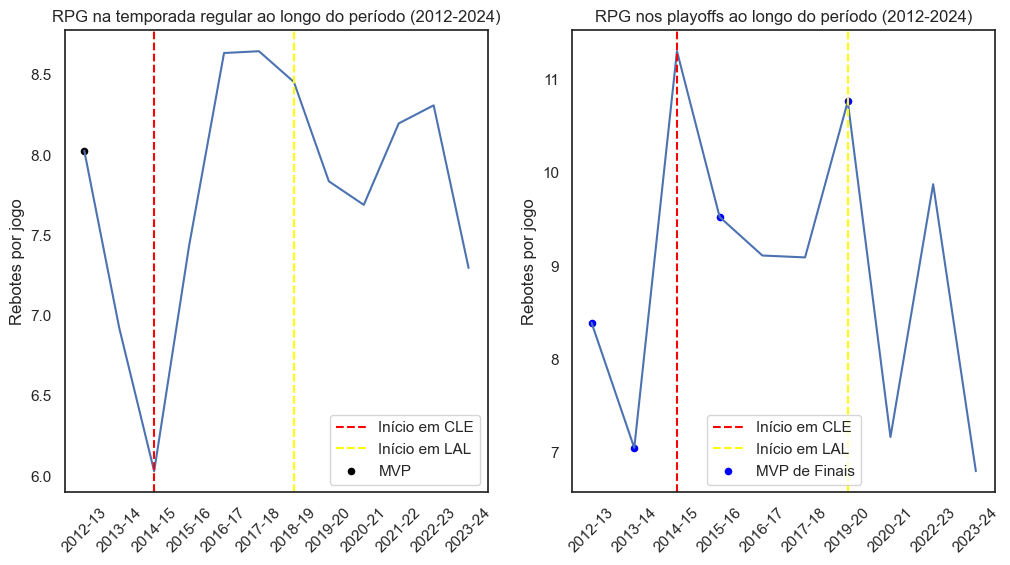

In [74]:
# Criando a figura e os subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Gráfico de barras do primeiro DataFrame
sns.lineplot(ax=axes[0], data = df_lebron_def, x = 'year', y='RPG')
axes[0].set_title('RPG na temporada regular')
axes[0].set_xlabel('')

# Adicionando as linhas 
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation = 45)
axes[0].set_xlabel('')
axes[0].set_ylabel('Rebotes por jogo')
axes[0].set_title('RPG na temporada regular ao longo do período (2012-2024)')
axes[0].axvline(x = 2, color='red', linestyle='--', label='Início em CLE')
axes[0].axvline(x = 6, color='yellow', linestyle='--', label='Início em LAL')
    
# Gráfico de barras do segundo DataFrame
sns.lineplot(ax=axes[1], data = df_lebron_def_offs, x = 'year', y='RPG')
axes[1].set_title('RPG nos playoffs')
axes[1].set_xlabel('')

# Adicionando as linhas
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation = 45)
axes[1].set_xlabel('')
axes[1].set_ylabel('Rebotes por jogo')
axes[1].set_title('RPG nos playoffs ao longo do período (2012-2024)')
axes[1].axvline(x = 2, color='red', linestyle='--', label='Início em CLE')
axes[1].axvline(x = 6, color='yellow', linestyle='--', label='Início em LAL')

# Adicionando um ponto específico
axes[0].scatter(df_lebron.loc[0, 'year'], df_lebron.loc[0, 'RPG'], color='black', s = 20, label='MVP')
axes[1].scatter(df_lebron_offs.loc[0, 'year'], df_lebron_offs.loc[0, 'RPG'], color='blue', s = 20, label='MVP de Finais')
axes[1].scatter(df_lebron_offs.loc[1, 'year'], df_lebron_offs.loc[1, 'RPG'], color='blue', s = 20)
axes[1].scatter(df_lebron_offs.loc[3, 'year'], df_lebron_offs.loc[3, 'RPG'], color='blue', s = 20)
axes[1].scatter(df_lebron_offs.loc[6, 'year'], df_lebron_offs.loc[6, 'RPG'], color='blue', s = 20)
# Adicionando a legenda
axes[0].legend()
axes[1].legend()

# Mostrar o gráfico
plt.show()


- Temporada regular : Vemos que após a sua temporada de MVP ele tem uma grande queda na sua última temporada pelo Miami Heat. Em seguida os números voltam a subir permanecem subindo até a temporada 2016-17. Apesar de algumas quedas posteriores, graficamente vemos que uma grande evolução neste quesito.
- Playoffs: Na fase de playoffs temos uma oscilação maior neste quesito e uma grande queda de rendimento na temporada 2021-22, na qual ele acaba tendo sua pior marca.

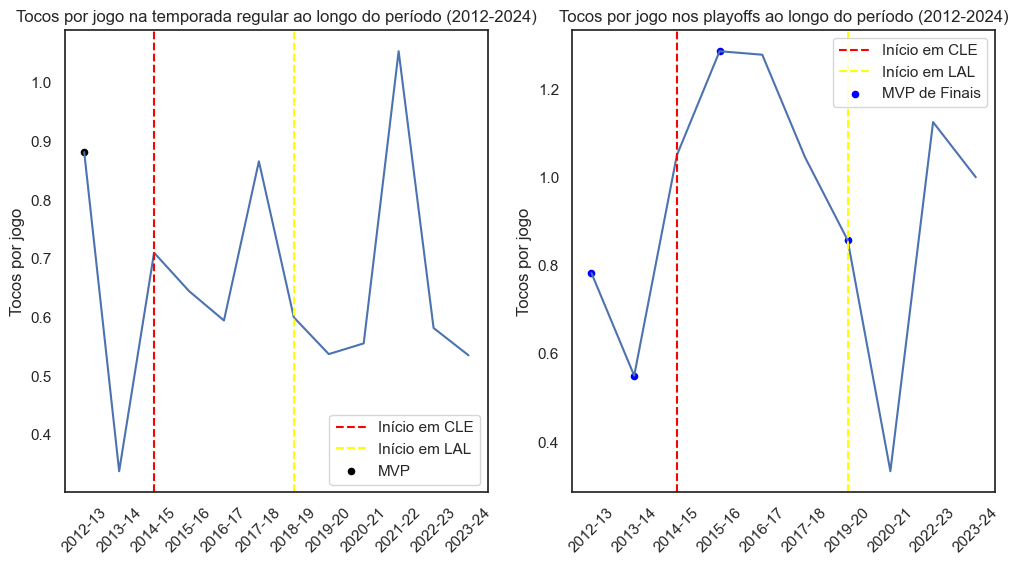

In [73]:
# Criando a figura e os subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Gráfico de barras do primeiro DataFrame
sns.lineplot(ax=axes[0], data = df_lebron_def, x = 'year', y='BPG')
axes[0].set_title('BPG na temporada regular')
axes[0].set_xlabel('')

# Adicionando as linhas 
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation = 45)
axes[0].set_xlabel('')
axes[0].set_ylabel('Tocos por jogo')
axes[0].set_title('Tocos por jogo na temporada regular ao longo do período (2012-2024)')
axes[0].axvline(x = 2, color='red', linestyle='--', label='Início em CLE')
axes[0].axvline(x = 6, color='yellow', linestyle='--', label='Início em LAL')
    
# Gráfico de barras do segundo DataFrame
sns.lineplot(ax=axes[1], data = df_lebron_def_offs, x = 'year', y='BPG')
axes[1].set_title('BPG nos playoffs')
axes[1].set_xlabel('')

# Adicionando as linhas
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation = 45)
axes[1].set_xlabel('')
axes[1].set_ylabel('Tocos por jogo')
axes[1].set_title('Tocos por jogo nos playoffs ao longo do período (2012-2024)')
axes[1].axvline(x = 2, color='red', linestyle='--', label='Início em CLE')
axes[1].axvline(x = 6, color='yellow', linestyle='--', label='Início em LAL')

# Adicionando um ponto específico
axes[0].scatter(df_lebron_def.loc[0, 'year'], df_lebron_def.loc[0, 'BPG'], color='black', s = 20, label='MVP')
axes[1].scatter(df_lebron_def_offs.loc[0, 'year'], df_lebron_def_offs.loc[0, 'BPG'], color='blue', s = 20, label='MVP de Finais')
axes[1].scatter(df_lebron_def_offs.loc[1, 'year'], df_lebron_def_offs.loc[1, 'BPG'], color='blue', s = 20)
axes[1].scatter(df_lebron_def_offs.loc[3, 'year'], df_lebron_def_offs.loc[3, 'BPG'], color='blue', s = 20)
axes[1].scatter(df_lebron_def_offs.loc[6, 'year'], df_lebron_def_offs.loc[6, 'BPG'], color='blue', s = 20)

# Adicionando a legenda
axes[0].legend()
axes[1].legend()

# Mostrar o gráfico
plt.show()


- Temporada regular: Vemos que após a sua temporada de MVP ele tem uma grande queda na sua penúltima temporada pelo Miami Heat. Em seguida os números voltam a subir, mas diferente dos rebotes por jogo, os números de tocos por jogo variam muito de temporada a temporada. Apesar disso, temos que a melhor temporada neste quesito é 2012-22 pelo Lakers.
- Playoffs: Assim como na temporada regular temos uma grande oscilação. O pico ocorre em 2015-16 ano do título e MPV das finais com o Cleveland Cavaliers. A sua pior marca é em 2019-20 pelo Lakers.

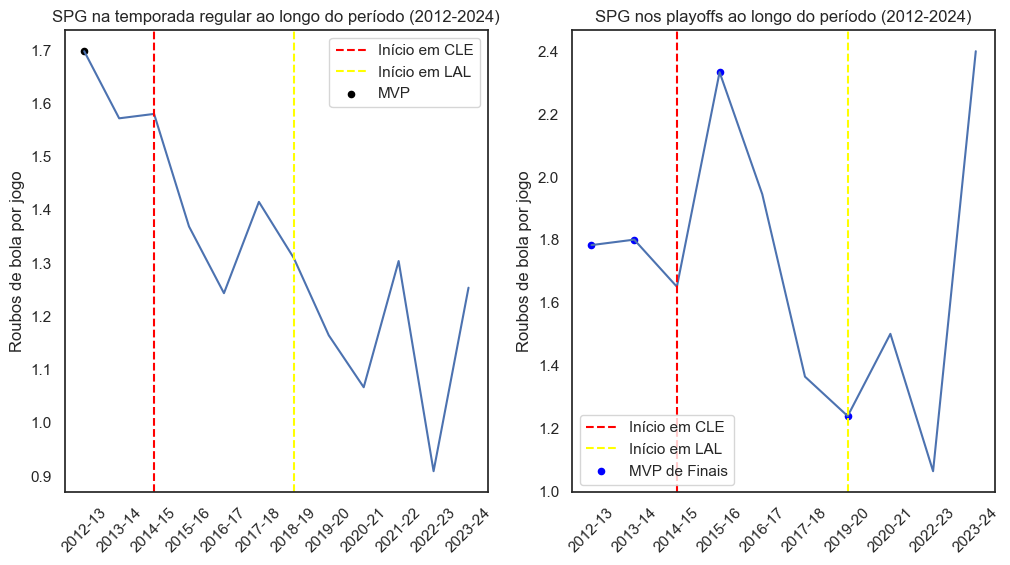

In [76]:
# Criando a figura e os subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Gráfico de barras do primeiro DataFrame
sns.lineplot(ax=axes[0], data = df_lebron_def, x = 'year', y='SPG')
axes[0].set_title('SPG na temporada regular')
axes[0].set_xlabel('')

# Adicionando as linhas 
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation = 45)
axes[0].set_xlabel('')
axes[0].set_ylabel('Roubos de bola por jogo')
axes[0].set_title('SPG na temporada regular ao longo do período (2012-2024)')
axes[0].axvline(x = 2, color='red', linestyle='--', label='Início em CLE')
axes[0].axvline(x = 6, color='yellow', linestyle='--', label='Início em LAL')
    
# Gráfico de barras do segundo DataFrame
sns.lineplot(ax=axes[1], data = df_lebron_def_offs, x = 'year', y='SPG')
axes[1].set_title('SPG nos playoffs')
axes[1].set_xlabel('')

# Adicionando as linhas
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation = 45)
axes[1].set_xlabel('')
axes[1].set_ylabel('Roubos de bola por jogo')
axes[1].set_title('SPG nos playoffs ao longo do período (2012-2024)')
axes[1].axvline(x = 2, color='red', linestyle='--', label='Início em CLE')
axes[1].axvline(x = 6, color='yellow', linestyle='--', label='Início em LAL')

# Adicionando um ponto específico
axes[0].scatter(df_lebron_def.loc[0, 'year'], df_lebron_def.loc[0, 'SPG'], color='black', s = 20, label='MVP')
axes[1].scatter(df_lebron_def_offs.loc[0, 'year'], df_lebron_def_offs.loc[0, 'SPG'], color='blue', s = 20, label='MVP de Finais')
axes[1].scatter(df_lebron_def_offs.loc[1, 'year'], df_lebron_def_offs.loc[1, 'SPG'], color='blue', s = 20)
axes[1].scatter(df_lebron_def_offs.loc[3, 'year'], df_lebron_def_offs.loc[3, 'SPG'], color='blue', s = 20)
axes[1].scatter(df_lebron_def_offs.loc[6, 'year'], df_lebron_def_offs.loc[6, 'SPG'], color='blue', s = 20)

# Adicionando a legenda
axes[0].legend()
axes[1].legend()

# Mostrar o gráfico
plt.show()


- Temporada regular: Após a sua temporada de MVP, onde ele obtém a sua maior marca, ele tem sucessivas quedas nos números de roubadas de bola por jogo. Na temporada 2022-23 ele tem sua pior marca. Apesar disso, na última temporada ele tem uma notável melhora nesses números.
- Playoffs: Durante os playoffs, ele tem uma notável melhora nos seus números, obtendo 2.4 SPG em 2023-24 pelo Lakers e 2.3 em 2015-16 pelo Cleveland Cavaliers. 

__Conclusão__: Vemos que o desempenho de LeBron James durante o período é extraordinário tanto na temporada regular como nos playoffs. Chama a atenção a sua capacidade de participar do jogo em diversos aspectos e o aumento de desempenho nos playoffs, fase decisiva do campeonato. Outro ponto importante é sua longevidade, visto que durante o período analisado ele não possui temporadas com números muito abaixo do seu padrão. Isto é acentuado quando em algumas estatísticas vemos o seu desempenho subir nas últimas temporadas como SPG e APG.

#### Stephen Curry

Para finalizar nossa análise exploratória de dados, vamos realizar o mesmo procedimento anterior para o jogador Stephen Curry.

In [58]:
## dados Curry durante as ultimas temporadas
df_curry = df.copy()

df_curry = df_curry.query('Season_type == "Regular%20Season" and PLAYER == "Stephen Curry"')[['year', 'TEAM', 'GP', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', "FT_PCT", 'BLK', 'PF', 'PTS', 'AST', 'REB', 'STL']]

df_curry['PPG'] = df_curry['PTS']/df_curry['GP']
df_curry['APG'] = df_curry['AST']/df_curry['GP']
df_curry['RPG'] = df_curry['REB']/df_curry['GP']
df_curry['RPG'] = df_curry['REB']/df_curry['GP']
df_curry['BPG'] = df_curry['BLK']/df_curry['GP']
df_curry['SPG'] = df_curry['STL']/df_curry['GP']
df_curry.reset_index(drop = True, inplace = True)

df_curry

,year,TEAM,GP,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,...,PF,PTS,AST,REB,STL,PPG,APG,RPG,BPG,SPG
0,2012-13,GSW,78,626,1388,0.451,272,600,0.453,262,...,198,1786,539,314,126,22.897436,6.910256,4.025641,0.153846,1.615385
1,2013-14,GSW,78,652,1383,0.471,261,615,0.424,308,...,194,1873,666,334,128,24.012821,8.538462,4.282051,0.179487,1.641026
2,2014-15,GSW,80,653,1341,0.487,286,646,0.443,308,...,158,1900,619,341,163,23.750000,7.737500,4.262500,0.200000,2.037500
3,2015-16,GSW,79,805,1598,0.504,402,886,0.454,363,...,161,2375,527,430,169,30.063291,6.670886,5.443038,0.189873,2.139241
4,2016-17,GSW,79,675,1443,0.468,324,789,0.411,325,...,183,1999,524,353,142,25.303797,6.632911,4.468354,0.215190,1.797468
5,2017-18,GSW,51,428,864,0.495,212,501,0.423,278,...,114,1346,310,261,80,26.392157,6.078431,5.117647,0.156863,1.568627
6,2018-19,GSW,69,632,1340,0.472,354,810,0.437,263,...,166,1881,361,369,92,27.260870,5.231884,5.347826,0.362319,1.333333
7,2019-20,GSW,5,33,82,0.402,12,49,0.245,26,...,11,104,33,26,5,20.800000,6.600000,5.200000,0.400000,1.000000
8,2020-21,GSW,63,658,1365,0.482,337,801,0.421,362,...,119,2015,363,345,77,31.984127,5.761905,5.476190,0.126984,1.222222
9,2021-22,GSW,64,535,1224,0.437,285,750,0.380,275,...,130,1630,404,335,85,25.468750,6.312500,5.234375,0.359375,1.328125


In [59]:
## dados Curry durante as ultimas temporadas
df_curry_offs = df.copy()

df_curry_offs = df_curry_offs.query('Season_type == "Playoffs" and PLAYER == "Stephen Curry"')[['year', 'TEAM', 'GP', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', "FT_PCT", 'BLK', 'PF', 'PTS', 'AST', 'REB', 'STL']]

df_curry_offs['PPG'] = df_curry_offs['PTS']/df_curry_offs['GP']
df_curry_offs['APG'] = df_curry_offs['AST']/df_curry_offs['GP']
df_curry_offs['RPG'] = df_curry_offs['REB']/df_curry_offs['GP']
df_curry_offs['RPG'] = df_curry_offs['REB']/df_curry_offs['GP']
df_curry_offs['BPG'] = df_curry_offs['BLK']/df_curry_offs['GP']
df_curry_offs['SPG'] = df_curry_offs['STL']/df_curry_offs['GP']
df_curry_offs.reset_index(drop = True, inplace = True)

df_curry_offs

,year,TEAM,GP,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,...,PF,PTS,AST,REB,STL,PPG,APG,RPG,BPG,SPG
0,2012-13,GSW,12,102,235,0.434,42,106,0.396,35,...,35,281,97,46,20,23.416667,8.083333,3.833333,0.166667,1.666667
1,2013-14,GSW,7,51,116,0.440,22,57,0.386,37,...,18,161,59,25,12,23.000000,8.428571,3.571429,0.142857,1.714286
2,2014-15,GSW,21,200,439,0.456,98,232,0.422,96,...,47,594,134,105,39,28.285714,6.380952,5.000000,0.142857,1.857143
3,2015-16,GSW,18,148,338,0.438,80,198,0.404,76,...,39,452,93,99,26,25.111111,5.166667,5.500000,0.277778,1.444444
4,2016-17,GSW,17,151,312,0.484,72,172,0.419,103,...,37,477,114,106,34,28.058824,6.705882,6.235294,0.235294,2.000000
5,2017-18,GSW,15,137,304,0.451,64,162,0.395,45,...,38,383,81,91,26,25.533333,5.400000,6.066667,0.733333,1.733333
6,2018-19,GSW,22,190,431,0.441,92,244,0.377,148,...,68,620,126,132,24,28.181818,5.727273,6.000000,0.181818,1.090909
7,2021-22,GSW,22,202,440,0.459,91,229,0.397,107,...,59,602,129,115,29,27.363636,5.863636,5.227273,0.363636,1.318182
8,2022-23,GSW,13,145,311,0.466,57,157,0.363,49,...,34,396,79,67,13,30.461538,6.076923,5.153846,0.461538,1.000000


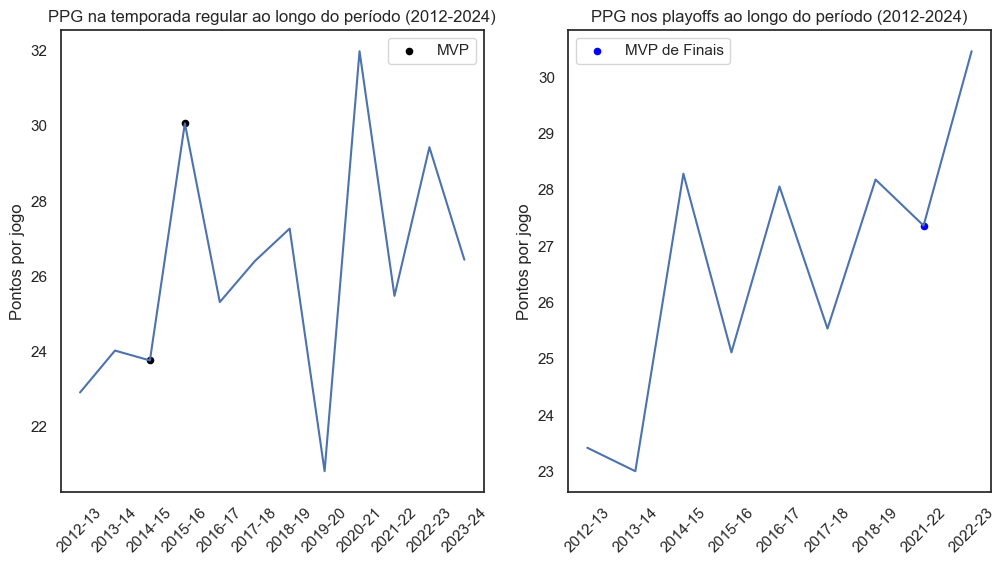

In [77]:
# Criando a figura e os subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Gráfico de barras do primeiro DataFrame
sns.lineplot(ax = axes[0], data = df_curry, x = 'year', y='PPG')
axes[0].set_title('PPG na temporada regular')
axes[0].set_xlabel('')

# Adicionando as linhas 
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation = 45)
axes[0].set_xlabel('')
axes[0].set_ylabel('Pontos por jogo')
axes[0].set_title('PPG na temporada regular ao longo do período (2012-2024)')
    
# Gráfico de barras do segundo DataFrame
sns.lineplot(ax=axes[1], data = df_curry_offs, x = 'year', y='PPG')
axes[1].set_title('PPG nos playoffs')
axes[1].set_xlabel('')

# Adicionando as linhas
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation = 45)
axes[1].set_xlabel('')
axes[1].set_ylabel('Pontos por jogo')
axes[1].set_title('PPG nos playoffs ao longo do período (2012-2024)')

# Adicionando um ponto específico
axes[0].scatter(df_curry.loc[2, 'year'], df_curry.loc[2, 'PPG'], color='black', s = 20, label='MVP')
axes[0].scatter(df_curry.loc[3, 'year'], df_curry.loc[3, 'PPG'], color='black', s = 20)
axes[1].scatter(df_curry_offs.loc[7, 'year'], df_curry_offs.loc[7, 'PPG'], color='blue', s = 20, label='MVP de Finais')


# Adicionando a legenda
axes[0].legend()
axes[1].legend()

# Mostrar o gráfico
plt.show()


- Temporada regular : Na temporada regular 2014-15 ele conquista o MVP da temporada regular (representado no gráfico pelo ponto preto) mesmo não sendo um dos seus maiores PPG no período. Em 2015-16 ele conquista o MVP novamente com uma impressionante melhora neste quesito (30 PPG). Após isso temos temporadas de oscilação até a temporada 2019-20 onde ele tem sua pior marca. Nesta temporada ele disputou apenas 5 dos 82 jogos possíveis**. Em 2020-21 ele atinge sua maior marca com (31.9 PPG).
- Playoffs: Também vemos uma grande oscilação entre as temporadas, mas vemos que em geral temos um desempenho acima da temporada regular. Sua maior marca é em 2022-23 com 30 PPG e ele, uma temporada após seu título de MVP das finais em 2021-22.


** Fonte: https://www.espn.com.br/nba/jogador/_/id/3975/stephen-curry


O próximo passo dessa análise é ver como estão distribuídos esses pontos durante a temporada regular. Podemos fazer isso através do gráfico de pizza a seguir:

In [61]:
## criação do dataset
df_curry_pts = df_regular.copy()

df_curry_pts = df_curry_pts.groupby('PLAYER')[['PTS', 'FGM', 'FG3M', 'FTM']].sum()

df_curry_pts = df_curry_pts.query('PLAYER == "Stephen Curry"')

df_curry_pts['FG2M'] = df_curry_pts['FGM'] - (df_curry_pts['FG3M'] + df_curry_pts['FTM'])

df_curry_pts

,PTS,FGM,FG3M,FTM,FG2M
PLAYER,,,,,
Stephen Curry,20513,6906,3375,3326,205


In [62]:
## criação do dataset
df_curry_pts_offs = df_playoffs.copy()

df_curry_pts_offs = df_curry_pts_offs.groupby('PLAYER')[['PTS', 'FGM', 'FG3M', 'FTM']].sum()

df_curry_pts_offs = df_curry_pts_offs.query('PLAYER == "Stephen Curry"')

df_curry_pts_offs['FG2M'] = df_curry_pts_offs['FGM'] - (df_curry_pts_offs['FG3M'] + df_curry_pts_offs['FTM'])

df_curry_pts_offs

,PTS,FGM,FG3M,FTM,FG2M
PLAYER,,,,,
Stephen Curry,3966,1326,618,696,12


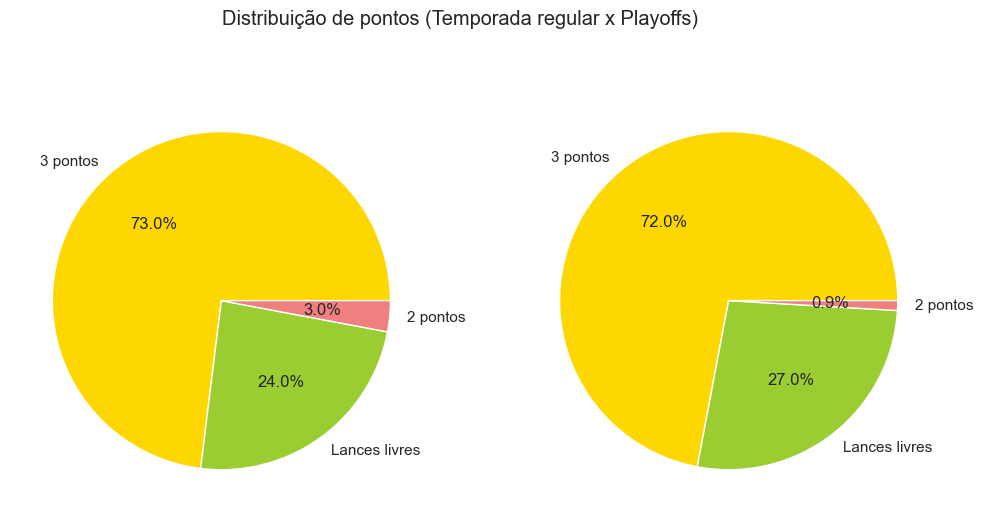

In [63]:
total_pontos = df_curry_pts['PTS'].sum()

total_2pontos = 2 * df_curry_pts['FG2M'].sum()
total_3pontos = 3 *df_curry_pts['FG3M'].sum()
total_1ponto = df_curry_pts['FTM'].sum()

total_pontos_offs = df_curry_pts_offs['PTS'].sum()

total_2pontos_offs = 2 * df_curry_pts_offs['FG2M'].sum()
total_3pontos_offs = 3 *df_curry_pts_offs['FG3M'].sum()
total_1ponto_offs = df_curry_pts_offs['FTM'].sum()

# Dados do gráfico
labels = ['3 pontos', 'Lances livres', '2 pontos']
sizes = [total_3pontos, total_1ponto, total_2pontos]
sizesoffs = [total_3pontos_offs, total_1ponto_offs, total_2pontos_offs]
colors = ['gold', 'yellowgreen', 'lightcoral']

# Criando a figura e os subplots
# Criando o gráfico de fatias
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
fig.suptitle('Distribuição de pontos (Temporada regular x Playoffs)')
axes[0].pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%')
axes[1].pie(sizesoffs, labels=labels, colors=colors,
        autopct='%1.1f%%')


plt.show()

Vemos que, como esperado, a maior parte da pontuação vem de cestas de 3 pontos. Isto era esperado dado que Stephen Curry é considerado por muitos como o maior arremessador de 3 pontos da história da NBA. Esta características no seu jogo explicam os 73% dos seus pontos vindo de arremessos de 3 pontos.

Seguindo a análise vamos ver seu desempenho na geração de jogo para seus companheiros através das assistências por jogo. 

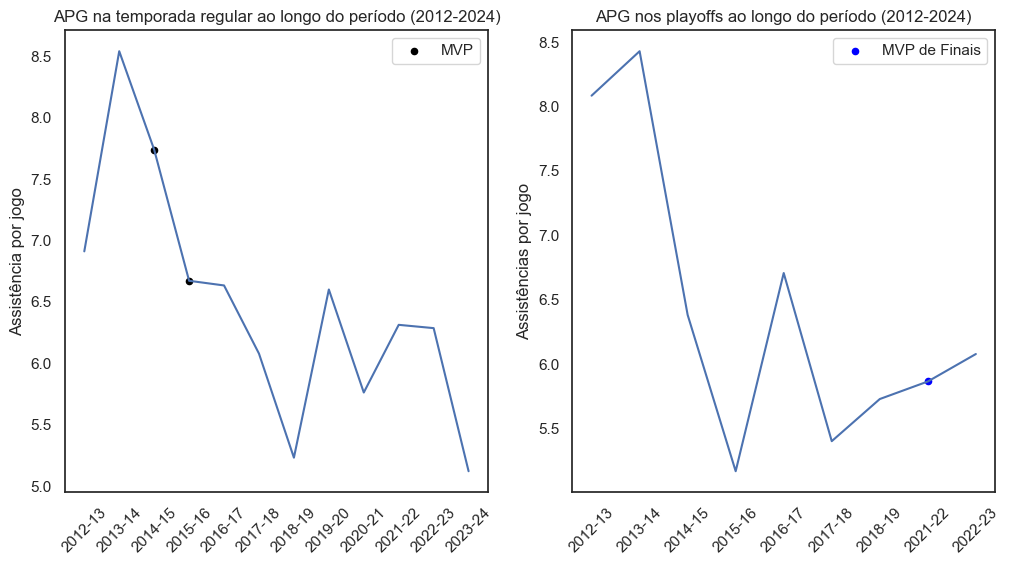

In [78]:
# Criando a figura e os subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Gráfico de barras do primeiro DataFrame
sns.lineplot(ax=axes[0], data = df_curry, x = 'year', y='APG')
axes[0].set_title('APG na temporada regular')
axes[0].set_xlabel('')

# Adicionando as linhas 
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation = 45)
axes[0].set_xlabel('')
axes[0].set_ylabel('Assistência por jogo')
axes[0].set_title('APG na temporada regular ao longo do período (2012-2024)')

# Gráfico de barras do segundo DataFrame
sns.lineplot(ax=axes[1], data = df_curry_offs, x = 'year', y='APG')
axes[1].set_title('APG nos playoffs')
axes[1].set_xlabel('')

# Adicionando as linhas
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation = 45)
axes[1].set_xlabel('')
axes[1].set_ylabel('Assistências por jogo')
axes[1].set_title('APG nos playoffs ao longo do período (2012-2024)')

# Adicionando um ponto específico
axes[0].scatter(df_curry.loc[2, 'year'], df_curry.loc[2, 'APG'], color='black', s = 20, label='MVP')
axes[0].scatter(df_curry.loc[3, 'year'], df_curry.loc[3, 'APG'], color='black', s = 20)
axes[1].scatter(df_curry_offs.loc[7, 'year'], df_curry_offs.loc[7, 'APG'], color='blue', s = 20, label='MVP de Finais')

# Adicionando a legenda
axes[0].legend()
axes[1].legend()

# Mostrar o gráfico
plt.show()


- Temporada regular e playoffs: Vemos que o seu desempenho em assistência por jogo vem diminuindo durante as temporadas. Seu pico, na temporada 2013-2015 foi 8.5 APG e hoje ele possui se encontra em 5.2 APG. Essa grande queda pode ser explicada devido ao seu companheiro de time Draymond Green ter assuimido mais a posição como armardor do time, deixando Stephen Curry com a obrigação principal de pontuar, sua principal virtude. Essa queda também é encontrada na fase de playoffs. 

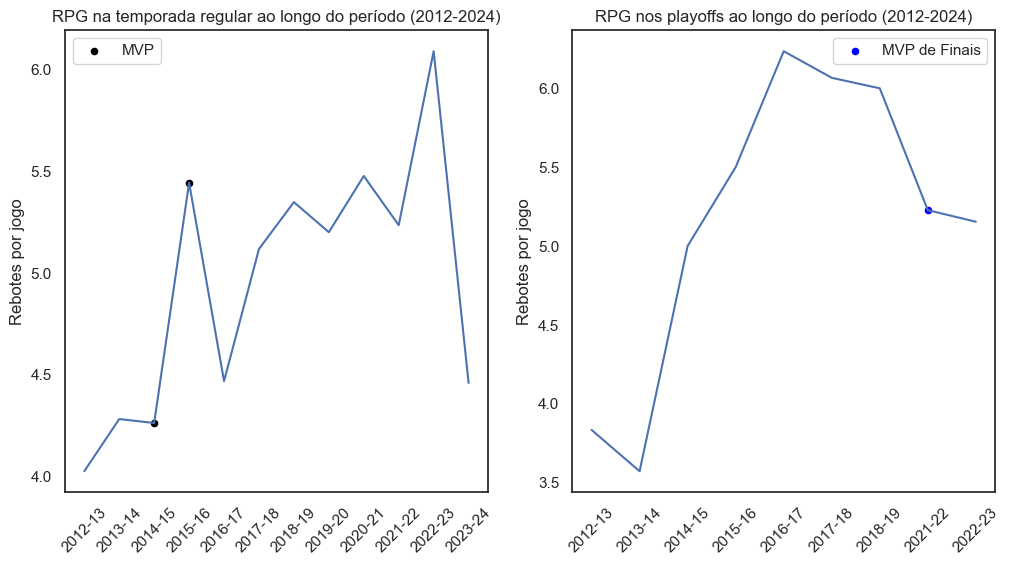

In [79]:
# Criando a figura e os subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Gráfico de barras do primeiro DataFrame
sns.lineplot(ax=axes[0], data = df_curry, x = 'year', y='RPG')
axes[0].set_title('RPG na temporada regular')
axes[0].set_xlabel('')

# Adicionando as linhas 
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation = 45)
axes[0].set_xlabel('')
axes[0].set_ylabel('Rebotes por jogo')
axes[0].set_title('RPG na temporada regular ao longo do período (2012-2024)')

# Gráfico de barras do segundo DataFrame
sns.lineplot(ax=axes[1], data = df_curry_offs, x = 'year', y='RPG')
axes[1].set_title('RPG nos playoffs')
axes[1].set_xlabel('')

# Adicionando as linhas
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation = 45)
axes[1].set_xlabel('')
axes[1].set_ylabel('Rebotes por jogo')
axes[1].set_title('RPG nos playoffs ao longo do período (2012-2024)')

# Adicionando um ponto específico
axes[0].scatter(df_curry.loc[2, 'year'], df_curry.loc[2, 'RPG'], color='black', s = 20, label='MVP')
axes[0].scatter(df_curry.loc[3, 'year'], df_curry.loc[3, 'RPG'], color='black', s = 20)
axes[1].scatter(df_curry_offs.loc[7, 'year'], df_curry_offs.loc[7, 'RPG'], color='blue', s = 20, label='MVP de Finais')

# Adicionando a legenda
axes[0].legend()
axes[1].legend()

# Mostrar o gráfico
plt.show()


- Temporada regular e playoffs: Diferente das assistência por jogo vemos que o seu desempenho nos rebotes vem aumentando durante as temporadas. Apesar de não ser um jogador considerado físico, ele possui um pico de 6 RPG na temporada regular de 2022-23 e 6.2 RPG nos playoffs de 2016-2017.

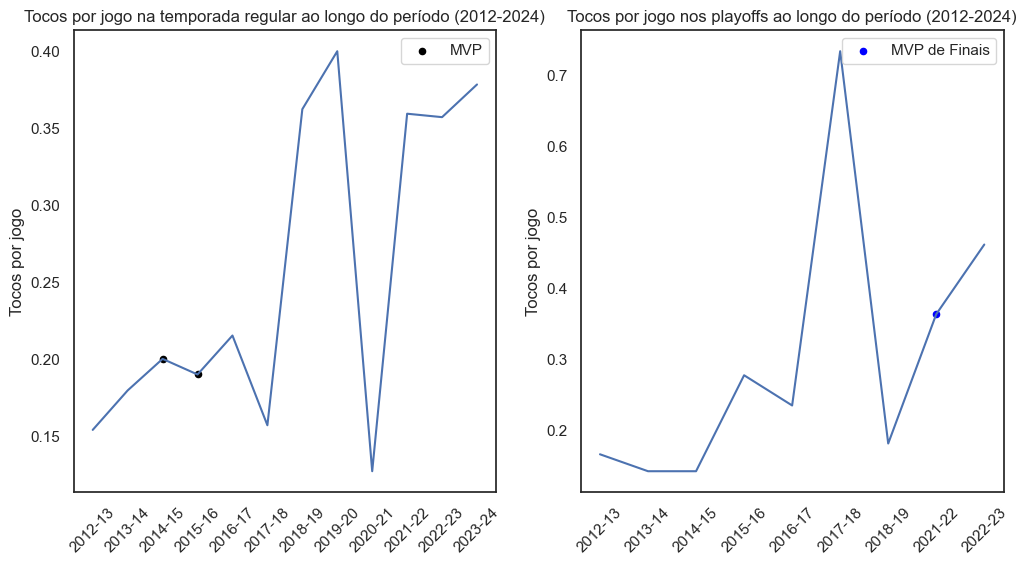

In [80]:
# Criando a figura e os subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Gráfico de barras do primeiro DataFrame
sns.lineplot(ax=axes[0], data = df_curry, x = 'year', y='BPG')
axes[0].set_title('BPG na temporada regular')
axes[0].set_xlabel('')

# Adicionando as linhas 
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation = 45)
axes[0].set_xlabel('')
axes[0].set_ylabel('Tocos por jogo')
axes[0].set_title('Tocos por jogo na temporada regular ao longo do período (2012-2024)')

# Gráfico de barras do segundo DataFrame
sns.lineplot(ax=axes[1], data = df_curry_offs, x = 'year', y='BPG')
axes[1].set_title('BPG nos playoffs')
axes[1].set_xlabel('')

# Adicionando as linhas
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation = 45)
axes[1].set_xlabel('')
axes[1].set_ylabel('Tocos por jogo')
axes[1].set_title('Tocos por jogo nos playoffs ao longo do período (2012-2024)')

# Adicionando um ponto específico
axes[0].scatter(df_curry.loc[2, 'year'], df_curry.loc[2, 'BPG'], color='black', s = 20, label='MVP')
axes[0].scatter(df_curry.loc[3, 'year'], df_curry.loc[3, 'BPG'], color='black', s = 20)
axes[1].scatter(df_curry_offs.loc[7, 'year'], df_curry_offs.loc[7, 'BPG'], color='blue', s = 20, label='MVP de Finais')

# Adicionando a legenda
axes[0].legend()
axes[1].legend()

# Mostrar o gráfico
plt.show()


Por se tratar de um jogador que não possui uma estatura alta e fisicalidade, não vamos nos apronfundar nesta estatística. Apesar disso, vemos uma grande oscilação entre as temporadas.

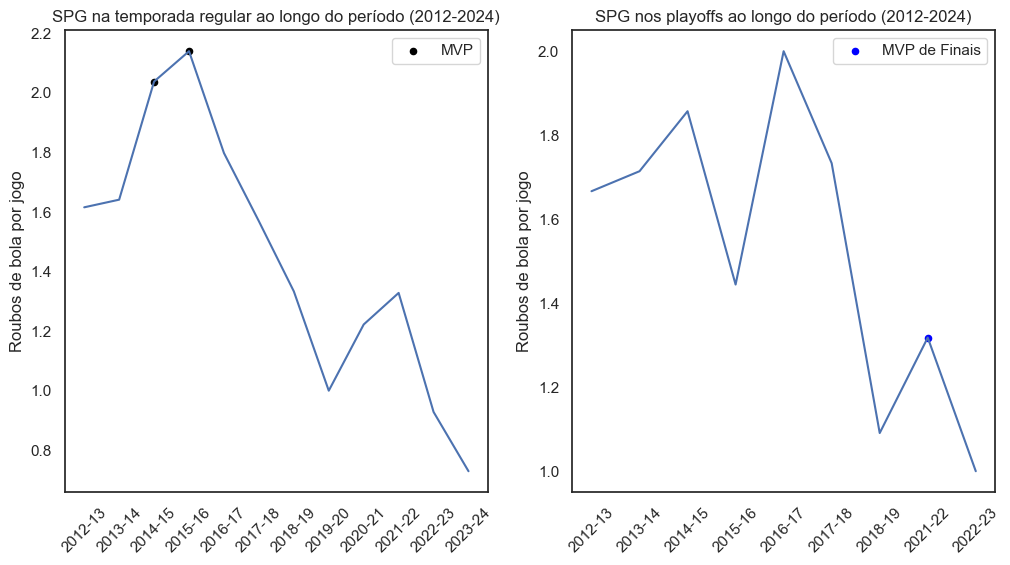

In [81]:
# Criando a figura e os subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Gráfico de barras do primeiro DataFrame
sns.lineplot(ax = axes[0], data = df_curry, x = 'year', y='SPG')
axes[0].set_title('SPG na temporada regular')
axes[0].set_xlabel('')

# Adicionando as linhas 
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation = 45)
axes[0].set_xlabel('')
axes[0].set_ylabel('Roubos de bola por jogo')
axes[0].set_title('SPG na temporada regular ao longo do período (2012-2024)')

# Gráfico de barras do segundo DataFrame
sns.lineplot(ax = axes[1], data = df_curry_offs, x = 'year', y='SPG')
axes[1].set_title('SPG nos playoffs')
axes[1].set_xlabel('')

# Adicionando as linhas
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation = 45)
axes[1].set_xlabel('')
axes[1].set_ylabel('Roubos de bola por jogo')
axes[1].set_title('SPG nos playoffs ao longo do período (2012-2024)')

# Adicionando um ponto específico
axes[0].scatter(df_curry.loc[2, 'year'], df_curry.loc[2, 'SPG'], color='black', s = 20, label='MVP')
axes[0].scatter(df_curry.loc[3, 'year'], df_curry.loc[3, 'SPG'], color='black', s = 20)
axes[1].scatter(df_curry_offs.loc[7, 'year'], df_curry_offs.loc[7, 'SPG'], color='blue', s = 20, label='MVP de Finais')

# Adicionando a legenda
axes[0].legend()
axes[1].legend()

# Mostrar o gráfico
plt.show()


- Temporada regular: Apesar da queda entre as temporadas, ele possui bons números de SPG, tendo seus maiores números nas suas temporadas de MVP (2014-15, 2015-16) com 2 e 2.1 SPG, respectivamente. Sua pior marca é a da última temporada com 0.73 SPG, reforçando a sua grande queda neste quesito.
- Playoffs: Também encontramos quedas neste quesito nos playoffs, entretanto, ele apresenta números melhores. Isso é normal pois jogos de playoff costumam exigir mais defensivamente de todos os jogadores.

__Conclusão__: Assim como LeBron James, temos um aumento de desempenho de Stephen Curry na fase de playoffs, embora essa diferença seja menor quando comparamos os jogadores. Além disso, diferente do caso anterior, vemos um grande volume de pontos vindo de arremessos de 3 pontos, o que é esperado dado o jogador e o estilo de jogo do Golden State Warriors. Outro ponto que notamos é que diferente do caso anterior, Stephen Curry tem um maior impacto em PPG e APG, apesar da última vir caindo com o passar das temporadas.

## Conclusão geral

Nesta análise exploratória de dados da NBA no período de 2012 a 2024, examinamos os números tanto da temporada regular quanto dos playoffs. Investigamos as diferenças entre as principais estatísticas do jogo (PTS, REB, AST, BLK, STL) nas duas fases e destacamos os principais jogadores em cada uma delas. Observamos que alguns atletas elevam seu desempenho na fase decisiva do campeonato, enquanto outros apresentam uma queda. Para avaliar essas variações, selecionamos os quatro jogadores com as maiores médias de pontos por jogo e analisamos seus casos com mais detalhe. Além disso, focamos em dois dos principais nomes desta geração, LeBron James e Stephen Curry, para examinar como o desempenho deles evoluiu ao longo dos anos, comparando a performance na temporada regular com os playoffs conforme as temporadas passaram.